# 🌊 Aquaculture Market Analysis: Identifying High-Potential Countries for Expansion

## 📖 Introduction
This project analyzes global aquaculture production data to uncover trends, top species, and countries with high potential for market expansion.

Assumed business case: You're a data analyst at a company that sells aquaculture tools and want to identify country that can became an option to expand into, based on volume, growth rate, and species trends.

This is the notebook that i used for the analising all of that, for full report you can go to: https://github.com/tojangeng262/aquaculture-market-analysis

## ⬇️Import the dataset

In [180]:
import pandas as pd
df = pd.read_csv('data_with_group_cleaned.csv')

### *Note!!! i already clean the dataset, so this notebook is all about the code i used for analysis

If you interested in the original data source, you can go to [FAO Stat](https://www.fao.org/fishery/statistics-query/en/global_production/global_production_quantity)

This is how the head look like

In [181]:
df.head()

,Country,Source,CPC Group Name,Continent,FAO Group Name,Unit,Year,Production
0,Afghanistan,Aquaculture production,"Fish live, fresh or chilled for human consumption",Asia,Freshwater &amp; diadromous fish,Tonnes - live weight,2023,11660.0
1,Afghanistan,Capture production,"Fish live, fresh or chilled for human consumption",Asia,Freshwater &amp; diadromous fish,Tonnes - live weight,2023,2000.0
2,Albania,Aquaculture production,"Fish live, fresh or chilled for human consumption",Europe,Demersal fish,Tonnes - live weight,2023,7667.0
3,Albania,Aquaculture production,"Fish live, fresh or chilled for human consumption",Europe,Freshwater &amp; diadromous fish,Tonnes - live weight,2023,1361.0
4,Albania,Aquaculture production,"Fish live, fresh or chilled for human consumption",Europe,Pelagic fish,Tonnes - live weight,2023,113.0


### First Question:

the first question that i want to answer is, what is the trend of fisheries production globally, especially in aquaculture? is it worth growing and worth to be invested?

so, i will use the sum of production, group by source and year with pivot

In [182]:
pivot_df_production_comparation = df.pivot_table(index='Year', columns='Source', values='Production', aggfunc='sum').fillna(0)
pivot_df_production_comparation.head()

Source,Aquaculture production,Capture production
Year,,
2000,4.301672e+07,9.658194e+07
2001,4.556109e+07,9.378700e+07
2002,4.867426e+07,9.415076e+07
2003,5.153513e+07,9.147197e+07
2004,5.581418e+07,9.622287e+07


I will create a line stacked chart with matplotlib to show the trend and comparation between the two. First time i created the graph, it look like that i dont get the thing that i want to show(you will see it later), so here i will reindexing the pivot data frame first

In [183]:
desired_order = ['Capture production', 'Aquaculture production']

# Reorder the columns of the DataFrame according to your desired list
pivot_df_production_comparation = pivot_df_production_comparation[desired_order]

Create the graph, stacking capture production first, and the aquaculture production

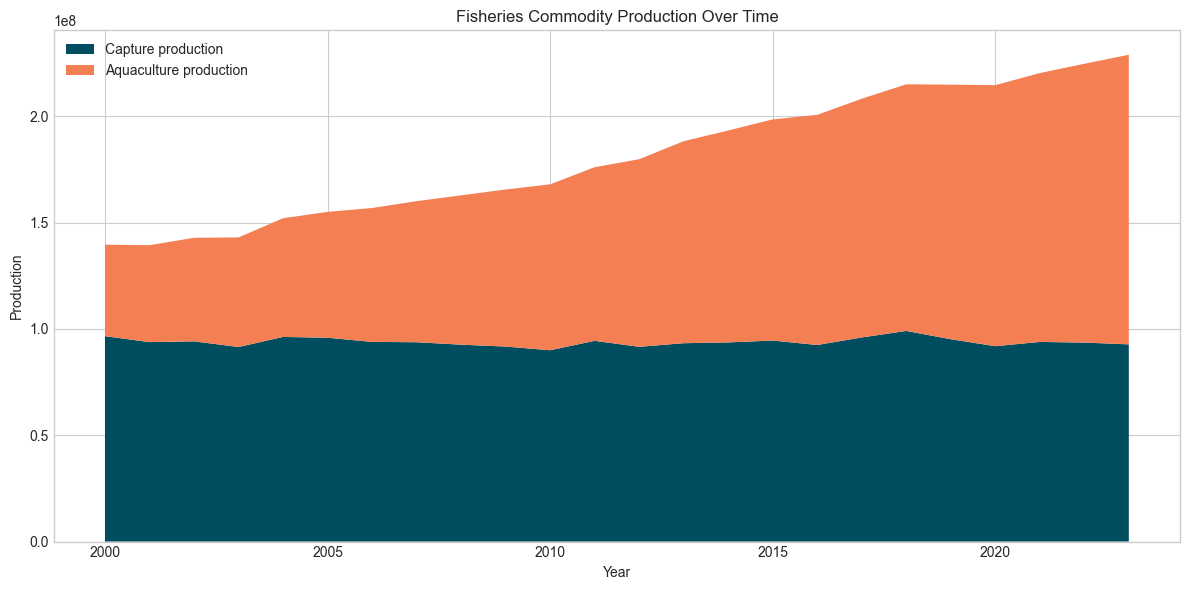

In [238]:
# import matplotlib for the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.stackplot(pivot_df_production_comparation.index,
              pivot_df_production_comparation.T,
              labels=pivot_df_production_comparation.columns,
              colors=["#004d60", "#f37f53"])
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Fisheries Commodity Production Over Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Look that i already show, how aquaculture production grow over time and it look like it was outcompeting the capture production. But i want to do another thing with my graph, i want to add annotation about how much is the share between the two source, also highlight the year when the aquaculture source already surpass the capture source. so, first thing i have to calculate all the value that i need

In [239]:
#find out the exact year
start_year = pivot_df_production_comparation.index.min()
print(start_year)
end_year = pivot_df_production_comparation.index.max()
print(end_year)
crossover_year = (pivot_df_production_comparation['Aquaculture production'] > pivot_df_production_comparation['Capture production']).idxmax()
print(crossover_year)

y_point_start = pivot_df_production_comparation.loc[start_year, 'Capture production'] + (pivot_df_production_comparation.loc[start_year, 'Aquaculture production'] / 2)
print(y_point_start)
y_point_end = pivot_df_production_comparation.loc[end_year, 'Capture production'] + (pivot_df_production_comparation.loc[end_year, 'Aquaculture production'] / 2)
print(y_point_end)
y_crossover_point = pivot_df_production_comparation.loc[crossover_year, 'Capture production'] + (pivot_df_production_comparation.loc[crossover_year, 'Aquaculture production'] / 2)
print(y_crossover_point)

aquaculture_share_start = (pivot_df_production_comparation.loc[start_year, 'Aquaculture production'] / pivot_df_production_comparation.loc[start_year].sum()) * 100
print(f"{aquaculture_share_start:.2f}")
aquaculture_share_end = (pivot_df_production_comparation.loc[end_year, 'Aquaculture production'] / pivot_df_production_comparation.loc[end_year].sum()) * 100
print(f"{aquaculture_share_end:.2f}")

2000
2023
2013
118090303.8295
160807380.76999998
140758866.53149998
30.81
59.49


The Year will be X axis value for annotation, For the Y axis, we will simply use the sum of capture add by half of aquaculture production sum. The number that we will display is the persentage that is the share of aquaculture in total production of fisheries product. Below is the code above when we already add the code for annotation. i will also add another thing, like the formatter to display the x axis in millions, etc to make the graph smoother

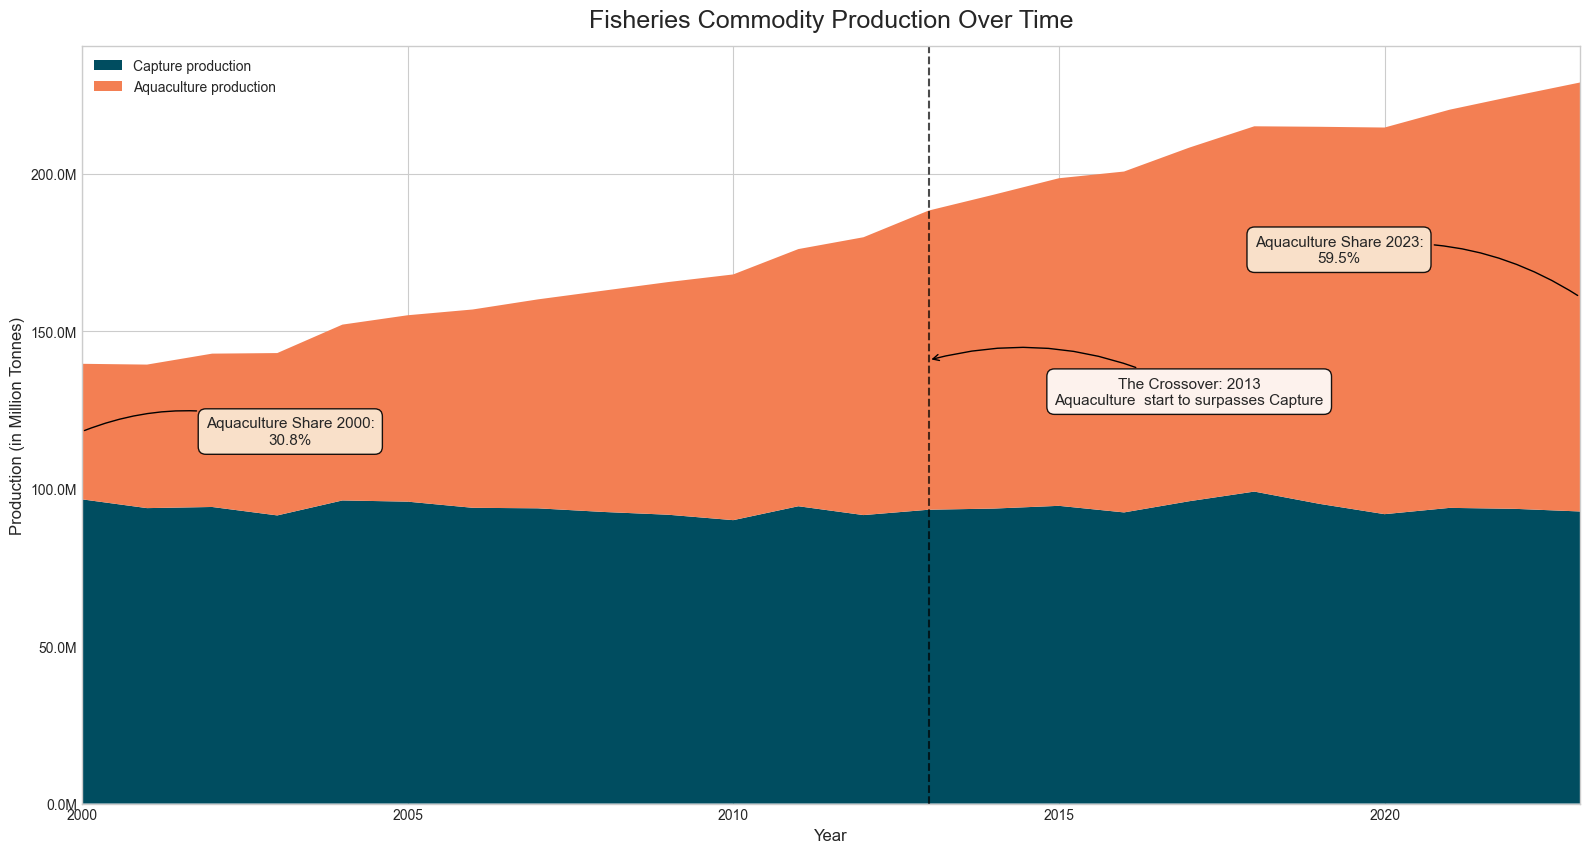

In [240]:
from matplotlib.ticker import FuncFormatter

def millions_formatter(x, pos):
    """The two args are the value and tick position."""
    return f'{x / 1000000:.1f}M'

formatter = FuncFormatter(millions_formatter)

plt.figure(figsize=(16, 9))
plt.stackplot(pivot_df_production_comparation.index,
              pivot_df_production_comparation.T,
              labels=pivot_df_production_comparation.columns,
              colors=["#004d60", "#f37f53"])
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Production (in Million Tonnes)',fontsize=12)
plt.title('Fisheries Commodity Production Over Time', fontsize=18, pad=14)
plt.legend(loc='upper left')

plt.annotate(
    text=f'Aquaculture Share {start_year}:\n{aquaculture_share_start:.1f}%',
    xy=(start_year, y_point_start),
    xytext=(start_year + 3.2, y_point_start),
    arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.2", color='black'),
    fontsize=11, ha='center', va='center',
    bbox=dict(boxstyle="round,pad=0.5", fc="antiquewhite", ec="black", lw=1, alpha=0.9)
)

plt.annotate(
    text=f'Aquaculture Share {end_year}:\n{aquaculture_share_end:.1f}%',
    xy=(end_year, y_point_end),
    xytext=(end_year - 3.7, y_point_end + 1.5e7),
    arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=-0.2", color='black'),
    fontsize=11,  ha='center', va='center',
    bbox=dict(boxstyle="round,pad=0.5", fc="antiquewhite", ec="black", lw=1, alpha=0.9)
)

plt.annotate(
    text=f'The Crossover: {crossover_year}\nAquaculture  start to surpasses Capture',
    xy=(crossover_year, y_crossover_point), # Arrow points to the crossover point on the line
    xytext=(crossover_year + 4, y_crossover_point + -1e7), # Position the text box to the right
    arrowprops=dict(
        arrowstyle="->", # A directed arrow
        connectionstyle="arc3,rad=0.2",
        color='black'
    ),
    fontsize=11,
    ha='center',
    va='center',
    bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black", lw=1, alpha=0.9)
)
plt.axvline(x=crossover_year, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
plt.xlim(pivot_df_production_comparation.index.min(), pivot_df_production_comparation.index.max())
plt.ylim(0)
plt.tight_layout(rect=[0, 0, 1, 0.96])
filename = "Fisheries_Commodity_Production_Over_Time.png"
plt.savefig(filename, dpi=300)
plt.show()


when compiling my notebook for publication in github, i think it would be fun to add a projected visualization to the project, maybe keep it simple and clean, since what the purpose of our analysis is it aquaculture businness worth to be invested. so below is the code i using to forecast my data to 3033, 10 years ahead

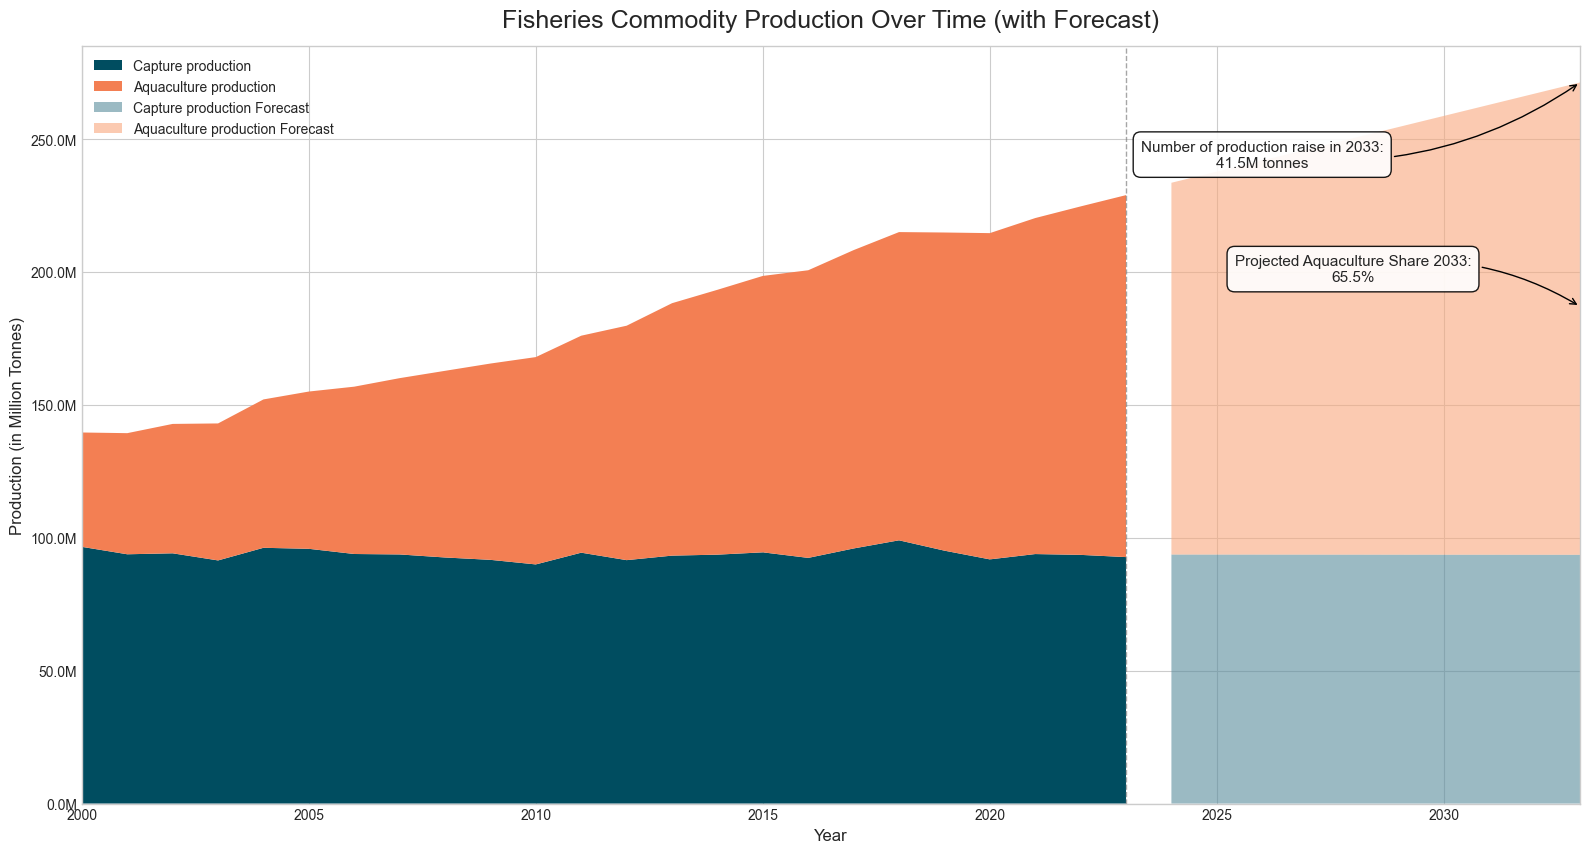

In [241]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Forecast horizon
forecast_years = 10

# Fit linear models for both Capture and Aquaculture
X_years = pivot_df_production_comparation.index.values.reshape(-1, 1)

forecast_dict = {}
for col in pivot_df_production_comparation.columns:
    y = pivot_df_production_comparation[col].values
    model = LinearRegression().fit(X_years, y)
    
    # Forecast future years
    future_years = np.arange(X_years.max() + 1, X_years.max() + 1 + forecast_years)
    future_preds = model.predict(future_years.reshape(-1, 1))
    
    forecast_dict[col] = future_preds

# Create forecast DataFrame
forecast_df = pd.DataFrame(forecast_dict, index=future_years)

# Calculate projected aquaculture share
final_year = future_years[-1]
proj_capture = forecast_df.iloc[-1][pivot_df_production_comparation.columns[0]]
proj_aqua = forecast_df.iloc[-1][pivot_df_production_comparation.columns[1]]
proj_total = proj_capture + proj_aqua
raise_value_aqua = proj_aqua - pivot_df_production_comparation.loc[end_year, 'Aquaculture production']
proj_aqua_share = (proj_aqua / proj_total) * 100

# Plot
def millions_formatter(x, pos):
    return f'{x / 1000000:.1f}M'

formatter = FuncFormatter(millions_formatter)

plt.figure(figsize=(16, 9))

# Historical
plt.stackplot(pivot_df_production_comparation.index,
              pivot_df_production_comparation.T,
              labels=pivot_df_production_comparation.columns,
              colors=["#004d60", "#f37f53"])

# Forecast (lighter colors)
plt.stackplot(forecast_df.index,
              forecast_df.T,
              colors=["#588c9c", "#f9a87d"],
              alpha=0.6,
              labels=[f"{col} Forecast" for col in pivot_df_production_comparation.columns])

plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Production (in Million Tonnes)', fontsize=12)
plt.title('Fisheries Commodity Production Over Time (with Forecast)', fontsize=18, pad=14)
plt.legend(loc='upper left')

# Vertical line at end of historical data
plt.axvline(x=X_years.max(), color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Annotation: Projected Aquaculture Share
plt.annotate(
    text=f'Projected Aquaculture Share {final_year}:\n{proj_aqua_share:.1f}%',
    xy=(final_year, proj_aqua + proj_capture / 10),
    xytext=(final_year - 5, proj_aqua + proj_capture / 4),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", color='black'),
    fontsize=11, ha='center', va='center',
    bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black", lw=1, alpha=0.9)
)

# Optional: annotate projected total production
plt.annotate(
    text=f'Number of production raise in {final_year}:\n{raise_value_aqua / 1e6:.1f}M tonnes',
    xy=(final_year, proj_total),
    xytext=(final_year - 7, proj_total * 0.9),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color='black'),
    fontsize=11, ha='center', va='center',
    bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black", lw=1, alpha=0.9)
)

plt.xlim(pivot_df_production_comparation.index.min(), forecast_df.index.max())
plt.ylim(0)
plt.tight_layout(rect=[0, 0, 1, 0.96])
filename = "Forecast_Fisheries_Commodity_Production_Over_Time.png"
plt.savefig(filename, dpi=300)
plt.show()


i think we already complete the question number 1, which is what is the trend of fisheries production globally, especially in aquaculture? is it worth growing and worth to be invested?

we can already say that trend that we have in fisheries production globaly is positive, the impact that was cause by the growing of aquaculture production, and still doesnt have a sign to pleateu

### Second Question

Which countries are the most significant producers in the global aquaculture market? Which are the top 10 countries by aquaculture production volume in the most recent year of data?


so, we will grouping with year and production like earlier, but this time we will use country instead of source. since we will only using data from aquaculture, for now i will create new dataframe call df_aqua

In [242]:
df_aqua =  df[df["Source"] == "Aquaculture production"]

since the value in source column is only aquaculture, then we will drop the column

In [243]:
df_aqua = df_aqua.drop("Source", axis=1)

first, we group top 10 production in latest year

In [244]:
top10_country_2023 = df_aqua[df_aqua["Year"]==2023].groupby("Country")["Production"].sum().sort_values(ascending=False).head(10)
top10_country_2023

Country
China                7.827694e+07
Indonesia            1.536143e+07
India                1.132112e+07
Viet Nam             5.378860e+06
Bangladesh           2.852572e+06
Philippines          2.384023e+06
Republic of Korea    2.304411e+06
Norway               1.649984e+06
Egypt                1.552430e+06
Chile                1.502919e+06
Name: Production, dtype: float64

and the we plot the top 10 countries production in 2023

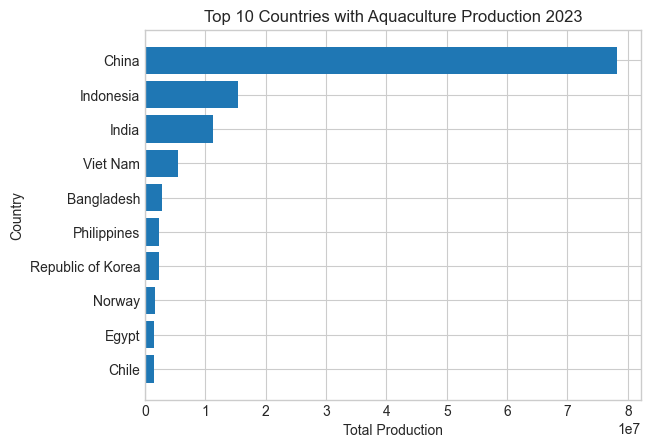

In [245]:
plt.barh(top10_country_2023.index, top10_country_2023.values)
plt.title("Top 10 Countries with Aquaculture Production 2023")
plt.xlabel("Total Production")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()

we will se how about the sum of production since 2000. i repeat what i do above

In [246]:
top10_country_sum_prod = df_aqua.groupby("Country")["Production"].sum().sort_values(ascending=False).head(10)
top10_country_sum_prod

Country
China                1.257572e+09
Indonesia            2.122243e+08
India                1.214030e+08
Viet Nam             6.889721e+07
Philippines          5.107220e+07
Bangladesh           3.939218e+07
Republic of Korea    3.780818e+07
Japan                2.688687e+07
Norway               2.615693e+07
Thailand             2.593408e+07
Name: Production, dtype: float64

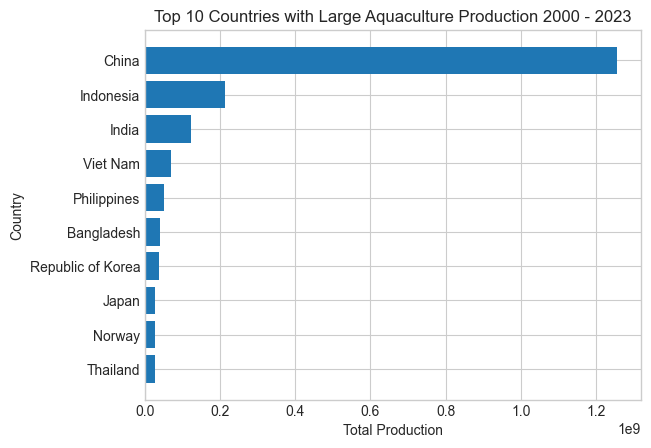

In [247]:
plt.barh(top10_country_sum_prod.index, top10_country_sum_prod.values)
plt.title("Top 10 Countries with Large Aquaculture Production 2000 - 2023")
plt.xlabel("Total Production")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()

note that in 2023 year thailand and japan wasnt in the top 10 countries. Since our main objective is to get the consistent country as top 10 producer of aquaculture commodities, i will put the average yearly production in the past 10 years in the graph and see is the country list still the same

In [248]:
country_mean_10year = df_aqua[df_aqua['Year'].between(2014,2023)].groupby("Country")["Production"].mean().sort_values(ascending=False).head(10)
country_mean_10year

Country
China          6.749260e+06
Indonesia      1.864571e+06
India          1.538594e+06
Bangladesh     6.555725e+05
Viet Nam       5.341822e+05
Egypt          4.709217e+05
Philippines    3.446192e+05
Myanmar        3.041725e+05
Chile          2.939013e+05
Norway         2.437274e+05
Name: Production, dtype: float64

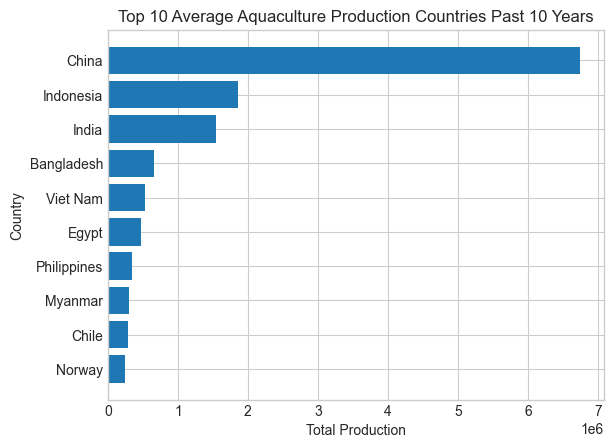

In [249]:
plt.barh(country_mean_10year.index, country_mean_10year.values)
plt.title("Top 10 Average Aquaculture Production Countries Past 10 Years")
plt.xlabel("Total Production")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()

to make a vizualisation, i will using top 10 average as index, and then make it as stacked bar horizontal chart that show the production since 2000, with the segment of early, and right now production. so first, filter the country to list, and make a dataframe that only include that country

In [250]:
top_10_mean_countries = country_mean_10year.index.tolist()

df_top10 = df_aqua[df_aqua['Country'].isin(top_10_mean_countries)].copy()

now, we will calculate production for 3 segment year which is 2000-2009, 2010-2019, 2020-2023, and then merge it as one dataframe

In [251]:
prod_2000_2009 = df_top10[df_top10['Year'] < 2010].groupby('Country')['Production'].sum()
prod_2000_2009.name = 'Prod_2000_2009'

prod_2010_2019 = df_top10[(df_top10['Year'] < 2020) & (df_top10['Year']>=2010)].groupby('Country')['Production'].sum()
prod_2010_2019.name = 'Prod_2010_2019'

prod_2020_2023 = df_top10[df_top10['Year'] >=2020].groupby('Country')['Production'].sum()
prod_2020_2023.name = 'Prod_2020_2023'


# --- Step 3: Create a clean DataFrame for plotting ---

# Combine the two series into a single DataFrame, using the overall total for sorting
plot_df_mean_10 = pd.DataFrame(df_aqua.groupby('Country')['Production'].sum()).loc[top_10_mean_countries]
plot_df_mean_10 = plot_df_mean_10.join(prod_2020_2023).join(prod_2010_2019).join(prod_2000_2009)
plot_df_mean_10 = plot_df_mean_10.fillna(0) # In case a country has no production in one period

# Sort by total production for an ordered chart (ascending for horizontal bar chart)
plot_df_mean_10 = plot_df_mean_10.sort_values(by='Production', ascending=True)
plot_df_mean_10

,Production,Prod_2020_2023,Prod_2010_2019,Prod_2000_2009
Country,,,,
Myanmar,1.862320e+07,4.706248e+06,9.735058e+06,4.181898e+06
Egypt,2.376578e+07,6.272945e+06,1.234731e+07,5.145518e+06
Chile,2.413689e+07,5.976074e+06,1.105353e+07,7.107282e+06
Norway,2.615693e+07,6.467249e+06,1.288908e+07,6.800610e+06
Bangladesh,3.939218e+07,1.080758e+07,1.986675e+07,8.717851e+06
Philippines,5.107220e+07,9.302423e+06,2.385650e+07,1.791328e+07
Viet Nam,6.889721e+07,1.992396e+07,3.469851e+07,1.427473e+07
India,1.214030e+08,3.960601e+07,5.349776e+07,2.829923e+07
Indonesia,2.122243e+08,5.960627e+07,1.304048e+08,2.221330e+07


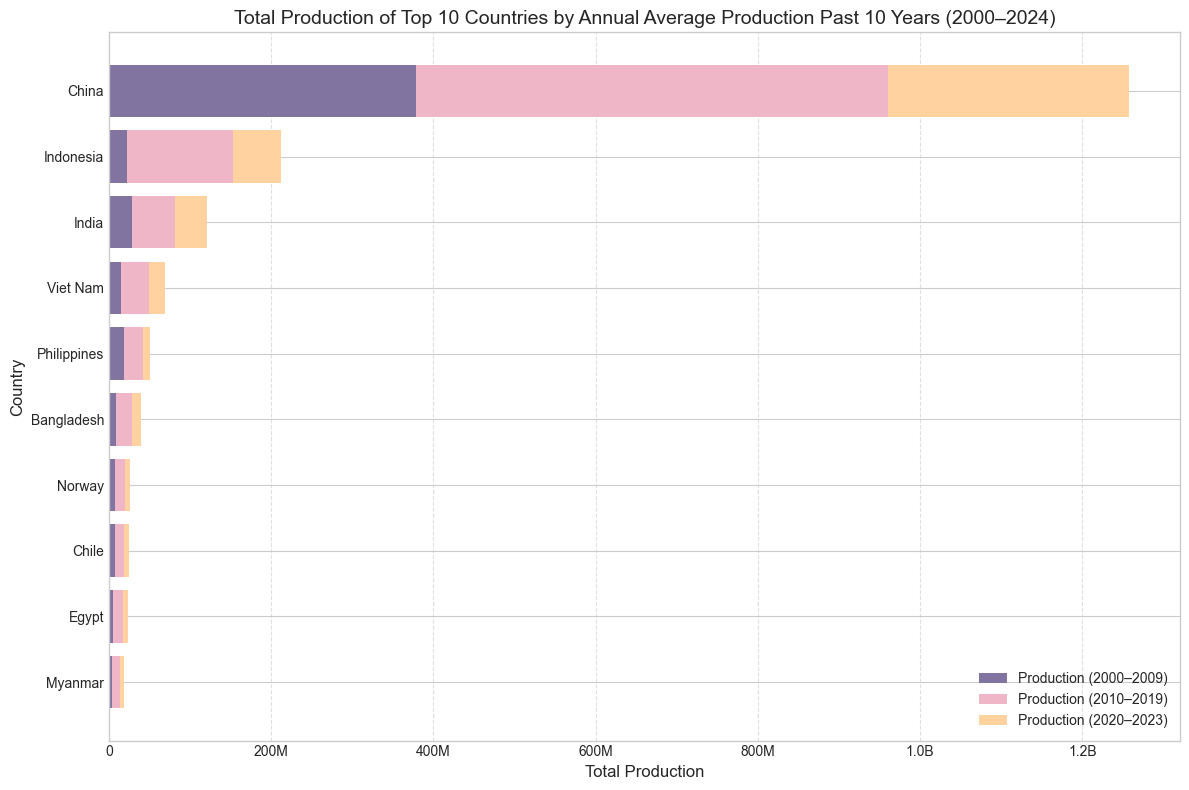

In [252]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(12, 8))

color_early = '#8174A0'
color_mid = '#EFB6C8'
color_recent = '#FFD2A0'

# Plot the base bar (2000-2009 production)
ax.barh(plot_df_mean_10.index, plot_df_mean_10['Prod_2000_2009'], color=color_early, label='Production (2000–2009)')

# Plot the second bar on top (stacked)
ax.barh(plot_df_mean_10.index, plot_df_mean_10['Prod_2010_2019'], left=plot_df_mean_10['Prod_2000_2009'],
        color=color_mid, label='Production (2010–2019)')

ax.barh(plot_df_mean_10.index, plot_df_mean_10['Prod_2020_2023'], left=plot_df_mean_10["Prod_2000_2009"] + plot_df_mean_10["Prod_2010_2019"],
        color=color_recent, label='Production (2020–2023)')

# Add labels and title
ax.set_xlabel('Total Production', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
ax.set_title('Total Production of Top 10 Countries by Annual Average Production Past 10 Years (2000–2024)', fontsize=14)

# Add a legend
ax.legend(loc='lower right')
# Add a light grid for reference


# Format the x-axis for readability (e.g., show "1.2B" instead of 1200000000)
def custom_formatter(x, pos):
    if x >= 1e9:
        return f'{x / 1e9:.1f}B'
    if x >= 1e6:
        return f'{x / 1e6:.0f}M'
    if x >= 1e3:
        return f'{x / 1e3:.0f}K'
    return f'{x:.0f}'

ax.xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

ax.grid(axis='x', linestyle='--', alpha=0.6)

# Ensure layout is clean
plt.tight_layout()
plt.savefig("Total_Production_of_Top_10_Countries_by_Annual_Average_Production_Past_10_Years_(2000–2024).png", dpi=300)
plt.show()

After i complete the graph above, i was thinking to add the percentage that will show how the recent annual average production(2020-2023), compare to annual average production for the entire year(2000-2023). Here's the code i add for that

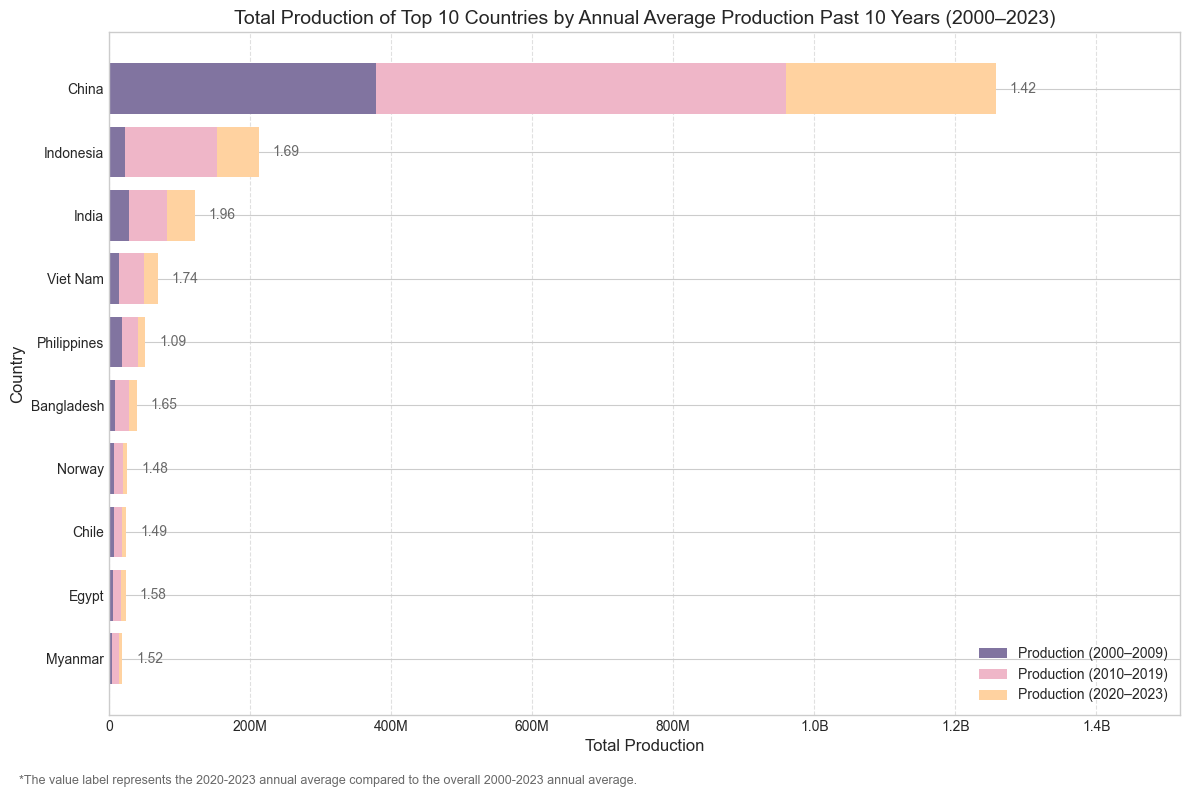

In [253]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd



fig, ax = plt.subplots(figsize=(12, 8))

color_early = '#8174A0'
color_mid = '#EFB6C8'
color_recent = '#FFD2A0'

# Plotting code remains the same
ax.barh(plot_df_mean_10.index, plot_df_mean_10['Prod_2000_2009'], color=color_early, label='Production (2000–2009)')
ax.barh(plot_df_mean_10.index, plot_df_mean_10['Prod_2010_2019'], left=plot_df_mean_10['Prod_2000_2009'],
        color=color_mid, label='Production (2010–2019)')
ax.barh(plot_df_mean_10.index, plot_df_mean_10['Prod_2020_2023'], left=plot_df_mean_10["Prod_2000_2009"] + plot_df_mean_10["Prod_2010_2019"],
        color=color_recent, label='Production (2020–2023)')

# Formatting code remains the same
ax.set_xlabel('Total Production', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
ax.set_title('Total Production of Top 10 Countries by Annual Average Production Past 10 Years (2000–2023)', fontsize=14)
ax.legend(loc='lower right')
ax.grid(axis='x', linestyle='--', alpha=0.6)

def custom_formatter(x, pos):
    if x >= 1e9:
        return f'{x / 1e9:.1f}B'
    if x >= 1e6:
        return f'{x / 1e6:.0f}M'
    return f'{x:.0f}'
ax.xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# ===================================================================
# START: CORRECTED Percentage Calculation
# ===================================================================

# Use the 'Production' column to find the end of the bar for positioning
# This column is the total production over all years.
bar_end_positions = plot_df_mean_10['Production']

# Calculate the DENOMINATOR: overall annual average (2000-2023)
# Total years = 10 + 10 + 4 = 24
overall_annual_avg = bar_end_positions / 24

# Calculate the NUMERATOR: annual average for the 2010-2019 decade
# This is the correct "recent average" to use for comparison
recent_decade_annual_avg = plot_df_mean_10['Prod_2020_2023'] / 4

# Calculate the percentage ratio and add labels
for i, country_name in enumerate(plot_df_mean_10.index):
    # Get the specific values for the current country
    recent_avg = recent_decade_annual_avg.loc[country_name]
    overall_avg = overall_annual_avg.loc[country_name]
    bar_end_pos = bar_end_positions.loc[country_name]

    # Calculate the percentage
    if overall_avg > 0:
        percentage = (recent_avg / overall_avg) 
    else:
        percentage = 0

    label_text = f'{percentage:.2f}'

    padding = ax.get_xlim()[1] * 0.015
    ax.text(bar_end_pos + padding, i, label_text,
            va='center', ha='left', fontsize=10, color='dimgray')

ax.set_xlim(right=ax.get_xlim()[1] * 1.15)

# ===================================================================
# END: CORRECTED Percentage Calculation
# ===================================================================

plt.tight_layout()
# Footnote explaining the percentage
fig.text(0.02, 0.01, '*The value label represents the 2020-2023 annual average compared to the overall 2000-2023 annual average.',
         ha='left', va='bottom', fontsize=9, color='dimgray')

# Adjust layout to make space for the footnote
plt.subplots_adjust(bottom=0.1)
filename = "Visuals/final/Total_Production_of_Top_10_Countries_by_Annual_Average_Production_Past_10_Years_final.png"
plt.savefig(filename, dpi=300)
plt.show()

I think we already get what we are looking for the questions two, Which countries are the most significant producers in the global aquaculture market? Which are the top 10 countries by aquaculture production volume in the most recent year of data? China still been the main player, with total production since 2000 is 1.2 Billion, with annual average production from the recent production still have a positive value, compare to the total of annual production. India and Viet Nam has the highest ratio of latest annual average production compare to the total, and philippines seems to face a stagnation, with the value close to 1

### Third Question

Which countries represent the greatest growth opportunity, not just the largest current market? What is the Compound Annual Growth Rate (CAGR) of aquaculture production for each country from 2000 to now? Which countries have the highest CAGR? For the top growth countries, how volatile is their year-on-year growth? Is it a smooth upward trend or erratic spikes and dips?

CAGR is calculated using  ```CAGR = ( (V_final / V_begin) ** (1 / t) ) - 1```, where the V final is final value, the V_begin is beginning value and the t represent time in years. Below is how i count the CAGR of all country in my dataframe

In [254]:
import numpy as np
n_years = end_year - start_year

# Calculate total production per country in start and end year
start_prod = df_aqua[df_aqua['Year'] == start_year].groupby('Country')['Production'].sum()
end_prod = df_aqua[df_aqua['Year'] == end_year].groupby('Country')['Production'].sum()

# Combine into a single DataFrame
cagr_df = pd.DataFrame({
    'Start Production': start_prod,
    'End Production': end_prod
}).dropna()

# Calculate CAGR
cagr_df['CAGR'] = ((cagr_df['End Production'] / cagr_df['Start Production']) ** (1 / n_years)) - 1

# Reset index for merging later
cagr_df = cagr_df.reset_index()

# Preview
cagr_df.sort_values('CAGR', ascending=False).head(10)


,Country,Start Production,End Production,CAGR
33,Cook Islands,0.0,9.50,inf
183,Vanuatu,0.0,5.00,inf
165,Timor-Leste,0.0,1165.00,inf
125,Oman,0.0,5093.00,inf
128,Palestine,0.0,631.00,inf
137,Qatar,0.0,69.32,inf
110,Micronesia (Federated States of),0.0,0.50,inf
105,Marshall Islands,0.0,2.96,inf
115,Nauru,0.0,0.50,inf
112,Mozambique,0.0,6035.00,inf


After calculating the CAGR, i try to calculate the YOY, using the pct change and save it in the percentage, first i group by country and year as df_pivot to make it easy to calculate

In [255]:
df_pivot = (
    df_aqua.groupby(['Country', 'Year'])['Production']
    .sum()
    .reset_index()
    .pivot(index='Year', columns='Country', values='Production')
)

In [256]:
# Calculate YoY with no fill, no deprecated default
df_yoy = df_pivot.pct_change(fill_method=None) * 100
df_yoy

Country,Afghanistan,Albania,Algeria,American Samoa,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,50.000000,-6.840391,29.344729,100.000000,120.000000,0.000000,-24.887892,49.048152,NaN,11.844279,...,NaN,5.151150,-80.000000,-29.440906,NaN,23.265457,17.444603,NaN,6.603774,6.229661
2002,0.000000,200.699301,4.845815,0.000000,363.636364,0.000000,8.731343,-23.365890,NaN,8.430279,...,NaN,3.858965,0.000000,-4.112337,NaN,8.247732,19.058760,NaN,2.433628,-0.962801
2003,0.000000,71.279070,-12.394958,0.000000,41.176471,0.000000,13.040494,4.313725,NaN,2.619929,...,NaN,9.435176,41.176471,-18.462343,NaN,-12.846837,32.652871,NaN,-2.786177,17.101193
2004,0.000000,6.517312,40.527578,0.000000,27.777778,0.000000,12.204007,-23.590226,NaN,12.912436,...,NaN,11.282467,-8.333333,-0.801796,inf,52.855778,27.413591,NaN,13.863586,13.396226
2005,0.000000,-6.118547,-37.201365,0.000000,36.956522,0.000000,11.309524,-9.102091,NaN,-0.512388,...,NaN,-15.413862,122.727273,22.858067,0.000000,-19.903357,19.667078,NaN,0.000000,-16.738769
2006,0.000000,39.646979,-21.739130,80.000000,23.809524,0.000000,22.897423,42.895805,NaN,15.155355,...,inf,1.176642,-24.489796,0.000000,3200.000000,21.466091,15.177787,-21.052632,1.658537,-0.079936
2007,133.333333,1.701507,40.625000,0.000000,21.794872,0.000000,16.969937,245.643939,NaN,12.171739,...,0.000000,1.168920,-16.216216,5.263158,-6.060606,-14.575582,25.567412,0.000000,12.783109,2.000000
2008,0.000000,-4.397706,586.399012,0.000000,0.000000,60.000000,-8.691241,39.726027,NaN,4.950211,...,0.000000,-4.699028,16.129032,2.500000,29.032258,-5.958008,17.951343,-50.000000,-4.016338,105.960784


i decided to calculate it with a loop, 

In [257]:
# Prepare summary table
summary_list = []

for country in df_pivot.columns:
    series = df_pivot[country].dropna()
    series = series[series > 0]  # Exclude zero production years at start

    if len(series) < 2:
        continue  # Skip countries without meaningful data

    # YoY metrics
    yoy_series = series.pct_change() * 100
    mean_yoy = yoy_series.mean(skipna=True)
    vol_yoy = yoy_series.std(skipna=True)

    # CAGR
    start_year = series.index.min()
    end_year = series.index.max()
    years = end_year - start_year

    if years > 0:
        cagr = ((series.iloc[-1] / series.iloc[0]) ** (1 / years) - 1) * 100
    else:
        cagr = np.nan

    # Latest production
    latest_volume = series.iloc[-1]

    # Append to list
    summary_list.append({
        'Country': country,
        'Mean_YoY_Growth': mean_yoy,
        'YoY_Volatility': vol_yoy,
        'CAGR': cagr,
        'Latest_Volume': latest_volume
    })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_list).set_index('Country')

summary_df

,Mean_YoY_Growth,YoY_Volatility,CAGR,Latest_Volume
Country,,,,
Afghanistan,19.774725,29.304590,17.249785,11660.000
Albania,21.226939,45.044850,16.000811,9327.000
Algeria,34.684773,126.230220,12.488799,5258.000
American Samoa,8.091787,27.003775,5.727281,18.000
Angola,74.755099,132.493507,39.349367,10313.000
...,...,...,...,...
Venezuela (Bolivarian Republic of),9.301604,22.354796,6.963761,63524.000
Viet Nam,11.079204,8.917195,10.752544,5378859.632
Yemen,-1.928850,40.468434,-18.297707,10.000


In [258]:
summary_df.describe()

,Mean_YoY_Growth,YoY_Volatility,CAGR,Latest_Volume
count,214.000000,213.000000,214.000000,2.140000e+02
mean,51.569434,169.186026,7.653939,6.363196e+05
std,216.468597,688.571810,14.685192,5.510608e+06
min,-30.158730,0.000000,-54.332886,2.500000e-01
25%,3.763755,15.270777,0.234001,9.250000e+01
50%,9.796569,27.567641,6.030279,3.942800e+03
75%,25.154399,69.745214,12.383891,3.695918e+04
max,2400.725678,8282.926699,130.940108,7.827694e+07


In [259]:
summary_df.sort_values('CAGR', ascending=False)


,Mean_YoY_Growth,YoY_Volatility,CAGR,Latest_Volume
Country,,,,
Greenland,146.666667,122.565175,130.940108,32.00
Cabo Verde,98.068182,161.760449,62.657656,35.00
Saint Pierre and Miquelon,555.823795,1083.936852,57.925514,49.00
Angola,74.755099,132.493507,39.349367,10313.00
Saint Vincent and the Grenadines,541.877828,1689.192323,38.515169,13.00
...,...,...,...,...
Tuvalu,-4.166667,47.843187,-13.910834,0.25
Turks and Caicos Islands,2.354167,53.154627,-17.217658,0.50
Yemen,-1.928850,40.468434,-18.297707,10.00


look like there are country that have high CAGR, i think i waill find the outlier and drop the value, first i will see what country have the outlier in CAGR

In [260]:
Q1_CAGR = np.percentile(summary_df['CAGR'],25)
Q3_CAGR = np.percentile(summary_df['CAGR'],75)
IQR_CAGR = Q3_CAGR - Q1_CAGR

lower_bound_cagr = Q1_CAGR - 1.5 * IQR_CAGR
upper_bound_cagr = Q3_CAGR + 1.5 * IQR_CAGR
outliers_cagr = summary_df['CAGR'][(summary_df['CAGR'] < lower_bound_cagr) | (summary_df['CAGR'] > upper_bound_cagr)]

list_negara_out = outliers_cagr.index.tolist()
list_negara_out

['Angola',
 'Benin',
 'Cabo Verde',
 'Falkland Islands (Malvinas)',
 'Greenland',
 'Kiribati',
 'Kyrgyzstan',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Yemen']

Check the overrall outlier

In [261]:
tessm = summary_df.reset_index()
tessm[tessm['Country'].isin(list_negara_out)]

,Country,Mean_YoY_Growth,YoY_Volatility,CAGR,Latest_Volume
4,Angola,74.755099,132.493507,39.349367,10313.0
19,Benin,251.028521,1066.321163,33.724730,3130.0
31,Cabo Verde,98.068182,161.760449,62.657656,35.0
64,Falkland Islands (Malvinas),-30.158730,52.236453,-54.332886,2.0
77,Greenland,146.666667,122.565175,130.940108,32.0
103,Kiribati,331.914691,1564.431607,-31.284368,2.0
105,Kyrgyzstan,58.795688,101.649695,31.864101,33600.0
163,Saint Pierre and Miquelon,555.823795,1083.936852,57.925514,49.0
164,Saint Vincent and the Grenadines,541.877828,1689.192323,38.515169,13.0
211,Yemen,-1.928850,40.468434,-18.297707,10.0


i think i want to remove all the outlier except for Angola and Kyrgyztan

In [262]:
outliers_remove = [country for country in list_negara_out if country not in ['Angola', 'Kyrgyzstan']]
outliers_remove

['Benin',
 'Cabo Verde',
 'Falkland Islands (Malvinas)',
 'Greenland',
 'Kiribati',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Yemen']

In [263]:
summary_df_clean = summary_df.reset_index()
summary_df_clean = summary_df_clean[~summary_df_clean['Country'].isin(outliers_remove)]
summary_df_clean = summary_df_clean.set_index('Country')
summary_df_clean.describe()

,Mean_YoY_Growth,YoY_Volatility,CAGR,Latest_Volume
count,206.000000,205.000000,206.000000,2.060000e+02
mean,44.381392,147.588835,6.883955,6.610151e+05
std,213.409606,680.574142,9.211892,5.615644e+06
min,-5.280680,0.000000,-17.217658,2.500000e-01
25%,3.763755,14.503754,0.473091,1.695000e+02
50%,9.354469,26.684059,5.945319,4.667000e+03
75%,22.269750,60.484158,12.058022,4.141966e+04
max,2400.725678,8282.926699,39.349367,7.827694e+07


after that i do the same thing in YoY_Volatility, find the outliers, watch the number and then remove it. note that i use np in before, its nothing actually, just forgot about .quantile() before

In [264]:
Q1_VOL = summary_df_clean['YoY_Volatility'].quantile(0.25)
Q3_VOL = summary_df_clean['YoY_Volatility'].quantile(0.75)
IQR_VOL = Q3_VOL - Q1_VOL

lower_bound_vol = Q1_VOL - 1.5 * IQR_VOL
upper_bound_vol = Q3_VOL + 1.5 * IQR_VOL
outliers_vol = summary_df_clean['YoY_Volatility'][(summary_df_clean['YoY_Volatility'] < lower_bound_vol) | (summary_df_clean['YoY_Volatility'] > upper_bound_vol)]

list_negara_out_2 = outliers_vol.index.tolist()
print(list_negara_out_2)

['Angola', 'Bahamas', 'Burkina Faso', 'Cayman Islands', 'Congo', 'Cook Islands', 'Dominica', 'Gambia', 'Grenada', 'Guinea', 'Lesotho', 'Mali', 'Malta', 'Marshall Islands', 'Mauritius', 'Mayotte', 'Qatar', 'Saint Lucia', 'Seychelles', 'Solomon Islands', 'Tajikistan', 'Timor-Leste', 'Tonga', 'Trinidad and Tobago', 'Vanuatu']


In [265]:
tessm2 = summary_df.reset_index()
tessm2[tessm2['Country'].isin(list_negara_out_2)]

,Country,Mean_YoY_Growth,YoY_Volatility,CAGR,Latest_Volume
4,Angola,74.755099,132.493507,39.349367,10313.000
12,Bahamas,60.176212,212.552676,-2.968725,1.000
29,Burkina Faso,73.472974,252.934451,26.847459,1187.000
35,Cayman Islands,43.953634,172.285553,14.720269,90.000
42,Congo,41.685788,158.287565,15.042931,1657.000
43,Cook Islands,52.634332,145.120631,25.918832,9.500
54,Dominica,69.940345,315.315644,-5.301115,2.000
72,Gambia,63.645801,296.219237,12.088217,69.000
78,Grenada,163.029621,507.304329,8.478597,26.000
83,Guinea,242.653069,1041.245138,8.089970,5985.000


i think malta and angola is the one i will save, even thou it have just like 1.e+4, but i think it best to keep them

In [266]:
outliers_remove2 = [country for country in list_negara_out_2 if country not in ['Angola', 'Malta']]
outliers_remove2

['Bahamas',
 'Burkina Faso',
 'Cayman Islands',
 'Congo',
 'Cook Islands',
 'Dominica',
 'Gambia',
 'Grenada',
 'Guinea',
 'Lesotho',
 'Mali',
 'Marshall Islands',
 'Mauritius',
 'Mayotte',
 'Qatar',
 'Saint Lucia',
 'Seychelles',
 'Solomon Islands',
 'Tajikistan',
 'Timor-Leste',
 'Tonga',
 'Trinidad and Tobago',
 'Vanuatu']

In [267]:
clean_df = summary_df_clean.reset_index()
clean_df = clean_df[~clean_df['Country'].isin(outliers_remove2)]
clean_df = clean_df.set_index('Country')
clean_df.describe()

,Mean_YoY_Growth,YoY_Volatility,CAGR,Latest_Volume
count,183.000000,182.000000,183.000000,1.830000e+02
mean,11.554210,33.861252,6.109459,7.439460e+05
std,12.555233,30.857028,8.590391,5.954726e+06
min,-5.280680,0.000000,-17.217658,2.500000e-01
25%,2.451156,12.961376,0.081776,5.786500e+02
50%,8.119160,23.950555,5.366902,6.035000e+03
75%,16.184568,46.010339,11.123288,8.468350e+04
max,74.755099,184.977025,39.349367,7.827694e+07


I will create a graph now, using scatter plot to show the distribution. i want to create a four quadrant, which will show the volatility vs cagr comparation. i will annotate the name of the 5 country that have the highest production in the latest year, and use it also as the size of the bubble

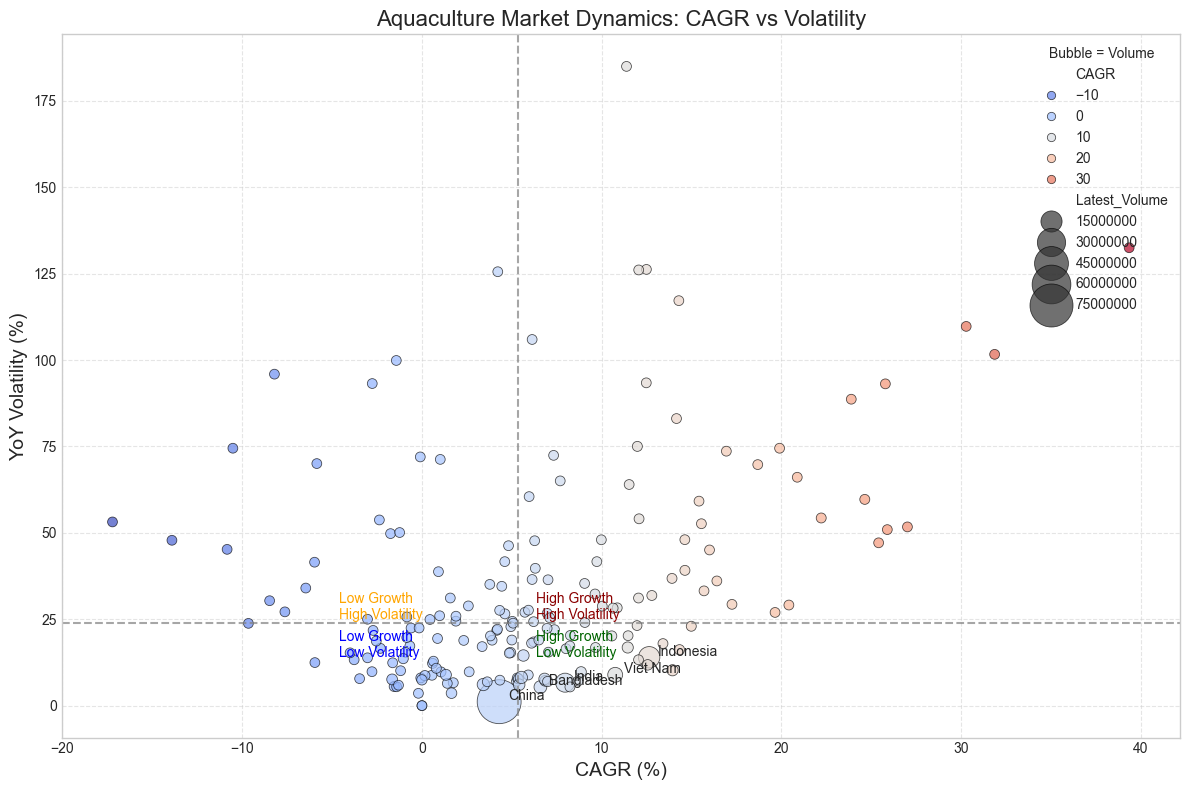

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=clean_df.reset_index(),
    x='CAGR',
    y='YoY_Volatility',
    size='Latest_Volume',
    sizes=(50, 1000),
    hue='CAGR',
    palette='coolwarm',
    edgecolor='black',
    alpha=0.7
)

# Annotate top N countries by volume
top_n = clean_df.sort_values('Latest_Volume', ascending=False).head(5)
for country, row in top_n.iterrows():
    plt.text(row['CAGR'] + 0.5, row['YoY_Volatility'] + 0.5, country,
             fontsize=10)

# Add quadrant lines
cagr_median = clean_df['CAGR'].median()
vol_median = clean_df['YoY_Volatility'].median()
plt.axvline(cagr_median, color='grey', linestyle='--', alpha=0.7)
plt.axhline(vol_median, color='grey', linestyle='--', alpha=0.7)

# Quadrant labels
plt.text(cagr_median + 1, vol_median + 1, 'High Growth\nHigh Volatility', fontsize=10, color='darkred')
plt.text(cagr_median + 1, vol_median - 10, 'High Growth\nLow Volatility', fontsize=10, color='darkgreen')
plt.text(cagr_median - 10, vol_median + 1, 'Low Growth\nHigh Volatility', fontsize=10, color='orange')
plt.text(cagr_median - 10, vol_median - 10, 'Low Growth\nLow Volatility', fontsize=10, color='blue')

plt.xlabel('CAGR (%)', fontsize=14)
plt.ylabel('YoY Volatility (%)', fontsize=14)
plt.title('Aquaculture Market Dynamics: CAGR vs Volatility', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(loc='upper right', title='Bubble = Volume')
filename = "Aquaculture_Market_Dynamics_CAGR_vs_Volatility.png"
plt.savefig(filename, dpi=300)
plt.show()


it look like that unless china, every other country that in top 5 production is on high growth and low volatility quandrant, where indonesia became the most promising country, from the growth, cagr, and also the number of prodution it have

it came to my mind that using absolute growth may help to visualize the volume since the last year production isnt the best year for every country. So i will make the graph again and using absolute growth as the size. and yeah, i also enhance the graph so its easier to read

In [269]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, Afghanistan to Zimbabwe
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean_YoY_Growth  183 non-null    float64
 1   YoY_Volatility   182 non-null    float64
 2   CAGR             183 non-null    float64
 3   Latest_Volume    183 non-null    float64
dtypes: float64(4)
memory usage: 7.1+ KB


i will recal pivot_df, that have the data that we need

In [270]:
df_pivot

Country,Afghanistan,Albania,Algeria,American Samoa,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2000,300.0,307.0,351.000,5.0,5.0,5.0,1784.000,893.0,NaN,32083.000,...,0.00,456830.000,85.000,5652.0,0.000,13505.00,513517.000,NaN,4240.0,2151.00
2001,450.0,286.0,454.000,10.0,11.0,5.0,1340.000,1331.0,NaN,35883.000,...,0.00,480362.000,17.000,3988.0,0.000,16647.00,603098.000,NaN,4520.0,2285.00
2002,450.0,860.0,476.000,10.0,51.0,5.0,1457.000,1020.0,NaN,38908.037,...,0.00,498899.000,17.000,3824.0,0.000,18020.00,718041.000,NaN,4630.0,2263.00
2003,450.0,1473.0,417.000,10.0,72.0,5.0,1647.000,1064.0,NaN,39927.400,...,0.00,545971.000,24.000,3118.0,0.000,15705.00,952502.000,NaN,4501.0,2650.00
2004,450.0,1569.0,586.000,10.0,92.0,5.0,1848.000,813.0,NaN,45083.000,...,0.00,607570.000,22.000,3093.0,1.000,24006.00,1213617.000,NaN,5125.0,3005.00
2005,450.0,1473.0,368.000,10.0,126.0,5.0,2057.000,739.0,NaN,44852.000,...,0.00,513920.000,49.000,3800.0,1.000,19228.00,1452300.000,380.0,5125.0,2502.00
2006,450.0,2057.0,288.000,18.0,156.0,5.0,2528.000,1056.0,NaN,51649.480,...,10.00,519967.000,37.000,3800.0,33.000,23355.50,1672727.000,300.0,5210.0,2500.00
2007,1050.0,2092.0,405.000,18.0,190.0,5.0,2957.000,3650.0,NaN,57936.120,...,10.00,526045.000,31.000,4000.0,31.000,19951.30,2100400.000,300.0,5876.0,2550.00
2008,1050.0,2000.0,2779.916,18.0,190.0,8.0,2700.000,5100.0,NaN,60804.080,...,10.00,501326.000,36.000,4100.0,40.000,18762.60,2477450.000,150.0,5640.0,5252.00


In [271]:
absolute_growth_df = df_pivot.diff()
absolute_growth_df

Country,Afghanistan,Albania,Algeria,American Samoa,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,150.0,-21.0,103.000,5.0,6.0,0.0,-444.000,438.0,NaN,3800.000,...,0.00,23532.000,-68.000,-1664.0,0.000,3142.00,89581.000,NaN,280.0,134.00
2002,0.0,574.0,22.000,0.0,40.0,0.0,117.000,-311.0,NaN,3025.037,...,0.00,18537.000,0.000,-164.0,0.000,1373.00,114943.000,NaN,110.0,-22.00
2003,0.0,613.0,-59.000,0.0,21.0,0.0,190.000,44.0,NaN,1019.363,...,0.00,47072.000,7.000,-706.0,0.000,-2315.00,234461.000,NaN,-129.0,387.00
2004,0.0,96.0,169.000,0.0,20.0,0.0,201.000,-251.0,NaN,5155.600,...,0.00,61599.000,-2.000,-25.0,1.000,8301.00,261115.000,NaN,624.0,355.00
2005,0.0,-96.0,-218.000,0.0,34.0,0.0,209.000,-74.0,NaN,-231.000,...,0.00,-93650.000,27.000,707.0,0.000,-4778.00,238683.000,NaN,0.0,-503.00
2006,0.0,584.0,-80.000,8.0,30.0,0.0,471.000,317.0,NaN,6797.480,...,10.00,6047.000,-12.000,0.0,32.000,4127.50,220427.000,-80.0,85.0,-2.00
2007,600.0,35.0,117.000,0.0,34.0,0.0,429.000,2594.0,NaN,6286.640,...,0.00,6078.000,-6.000,200.0,-2.000,-3404.20,427673.000,0.0,666.0,50.00
2008,0.0,-92.0,2374.916,0.0,0.0,3.0,-257.000,1450.0,NaN,2867.960,...,0.00,-24719.000,5.000,100.0,9.000,-1188.70,377050.000,-150.0,-236.0,2702.00


and calculate its average

In [272]:
avg_absolute_growth = absolute_growth_df.mean()
avg_absolute_growth

Country
Afghanistan                              493.913043
Albania                                  392.173913
Algeria                                  213.347826
American Samoa                             0.565217
Angola                                   448.173913
                                          ...      
Venezuela (Bolivarian Republic of)      2174.739130
Viet Nam                              211536.636174
Yemen                                    -20.555556
Zambia                                  3147.260870
Zimbabwe                                 285.371739
Length: 214, dtype: float64

put the value in the data frame

In [273]:
clean_df['Avg_Absolute_Growth'] = avg_absolute_growth
clean_df

,Mean_YoY_Growth,YoY_Volatility,CAGR,Latest_Volume,Avg_Absolute_Growth
Country,,,,,
Afghanistan,19.774725,29.304590,17.249785,11660.000,493.913043
Albania,21.226939,45.044850,16.000811,9327.000,392.173913
Algeria,34.684773,126.230220,12.488799,5258.000,213.347826
American Samoa,8.091787,27.003775,5.727281,18.000,0.565217
Angola,74.755099,132.493507,39.349367,10313.000,448.173913
...,...,...,...,...,...
Uzbekistan,17.155720,22.968013,14.985639,140283.000,5853.521739
Venezuela (Bolivarian Republic of),9.301604,22.354796,6.963761,63524.000,2174.739130
Viet Nam,11.079204,8.917195,10.752544,5378859.632,211536.636174


put it all as a graph

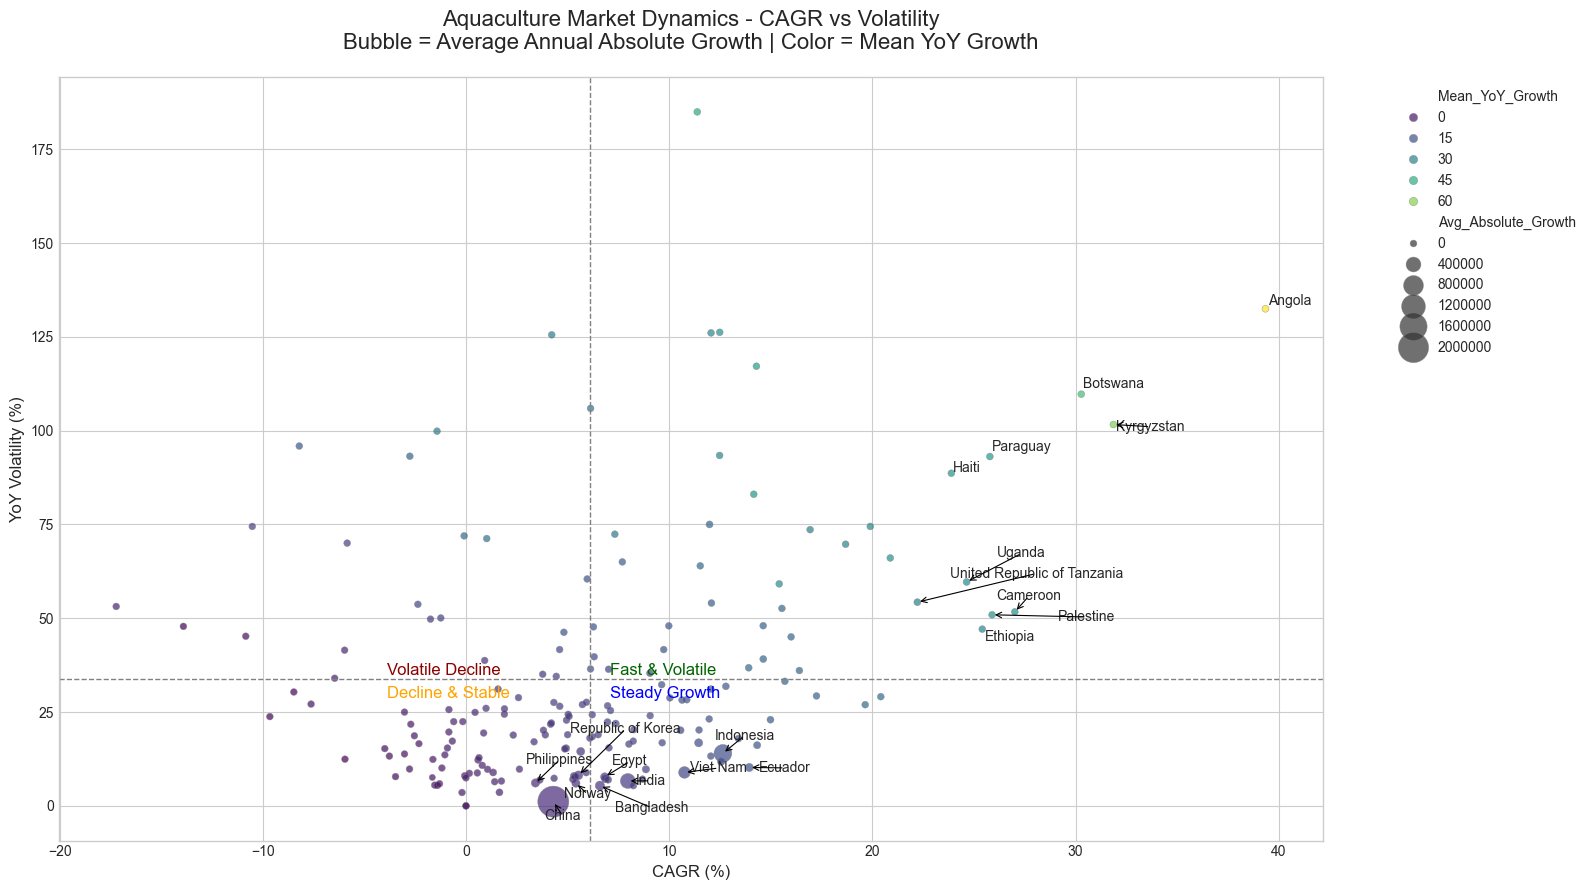

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Start plot
plt.figure(figsize=(16, 9))
scatter = sns.scatterplot(
    data=clean_df,
    x='CAGR',
    y='YoY_Volatility',
    size='Avg_Absolute_Growth',
    sizes=(20, 500),
    hue='Mean_YoY_Growth',
    palette='viridis',
    edgecolor='gray',
    alpha=0.7,
    legend='brief'
)

# Quadrant lines
mean_cagr = clean_df['CAGR'].mean()
mean_vol = clean_df['YoY_Volatility'].mean()
plt.axvline(mean_cagr, color='gray', linestyle='--', linewidth=1)
plt.axhline(mean_vol, color='gray', linestyle='--', linewidth=1)

# Add quadrant titles
plt.text(mean_cagr + 1, mean_vol + 1, 'Fast & Volatile', fontsize=12, color='darkgreen')
plt.text(mean_cagr - 10, mean_vol + 1, 'Volatile Decline', fontsize=12, color='darkred')
plt.text(mean_cagr + 1, mean_vol - 5, 'Steady Growth', fontsize=12, color='blue')
plt.text(mean_cagr - 10, mean_vol - 5, 'Decline & Stable', fontsize=12, color='orange')

# Annotate with arrows & adjustText
texts = []
top_growers = clean_df.nlargest(10, 'Avg_Absolute_Growth')
top_cagr = clean_df.nlargest(10,'CAGR')

for country, row in pd.concat([top_growers, top_cagr]).drop_duplicates().iterrows():
    texts.append(
        plt.text(row['CAGR'], row['YoY_Volatility'], country, fontsize=10)
    )

adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='black', lw=0.8),
    expand_points=(1.2, 1.2),
    expand_text=(1.2, 1.2),
    force_text=0.5,
    force_points=0.5
)

# Labels & title
title = 'Aquaculture Market Dynamics - CAGR vs Volatility'
plt.title(title + '\nBubble = Average Annual Absolute Growth | Color = Mean YoY Growth', fontsize=16, pad=20)
plt.xlabel('CAGR (%)', fontsize=12)
plt.ylabel('YoY Volatility (%)', fontsize=12)

# Legend positioning
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Save the figure
filename = "Aquaculture_Market_Dynamics_CAGR_vs_Volatility2.png"
plt.savefig(filename, dpi=300)
plt.show()


i cannot sure which one to use for the line, so here i will try using median

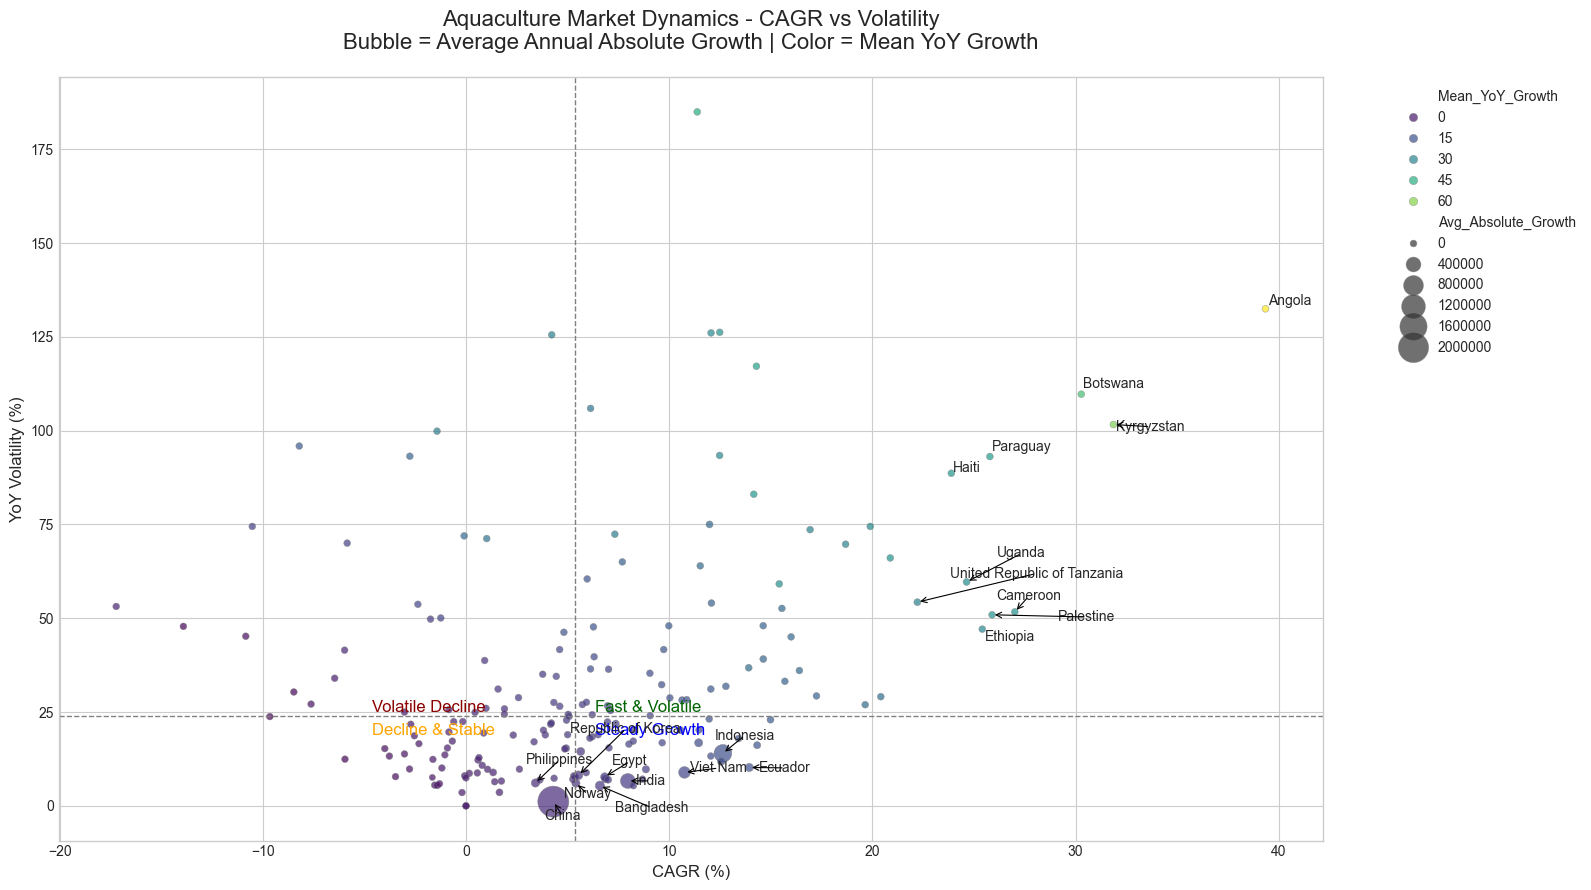

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Start plot
plt.figure(figsize=(16, 9))
scatter = sns.scatterplot(
    data=clean_df,
    x='CAGR',
    y='YoY_Volatility',
    size='Avg_Absolute_Growth',
    sizes=(20, 500),
    hue='Mean_YoY_Growth',
    palette='viridis',
    edgecolor='gray',
    alpha=0.7,
    legend='brief'
)

# Quadrant lines
median_cagr = clean_df['CAGR'].median()
median_vol = clean_df['YoY_Volatility'].median()
plt.axvline(median_cagr, color='gray', linestyle='--', linewidth=1)
plt.axhline(median_vol, color='gray', linestyle='--', linewidth=1)

# Add quadrant titles
plt.text(median_cagr + 1, median_vol + 1, 'Fast & Volatile', fontsize=12, color='darkgreen')
plt.text(median_cagr - 10, median_vol + 1, 'Volatile Decline', fontsize=12, color='darkred')
plt.text(median_cagr + 1, median_vol - 5, 'Steady Growth', fontsize=12, color='blue')
plt.text(median_cagr - 10, median_vol - 5, 'Decline & Stable', fontsize=12, color='orange')

# Annotate with arrows & adjustText
texts = []
top_growers = clean_df.nlargest(10, 'Avg_Absolute_Growth')
top_cagr = clean_df.nlargest(10,'CAGR')

for country, row in pd.concat([top_growers, top_cagr]).drop_duplicates().iterrows():
    texts.append(
        plt.text(row['CAGR'], row['YoY_Volatility'], country, fontsize=10)
    )

adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='black', lw=0.8),
    expand_points=(1.2, 1.2),
    expand_text=(1.2, 1.2),
    force_text=0.5,
    force_points=0.5
)

# Labels & title
title = 'Aquaculture Market Dynamics - CAGR vs Volatility'
plt.title(title + '\nBubble = Average Annual Absolute Growth | Color = Mean YoY Growth', fontsize=16, pad=20)
plt.xlabel('CAGR (%)', fontsize=12)
plt.ylabel('YoY Volatility (%)', fontsize=12)

# Legend positioning
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Save the figure
filename = "Aquaculture_Market_Dynamics_CAGR_vs_Volatility_median.png"
plt.savefig(filename, dpi=300)
plt.show()


i think thats it for questions 3, angola is the countries represent the greatest growth opportunity, but also have a large volatility? For the top growth countries that have a good volatility, it have Indonesia, Viet nam, and Ecuador where indonesia have the largest average absolute annual growth among them. Choosing between median and mean doesnt really change much, it just norway and korea is closer to the steady growth kuadrant. but still doesnt change tfrom the first position

### Fourth Question

For the most promising countries, what is the composition of their aquaculture industry? For your shortlist of promising countries (the high-volume, high-growth ones), what is the breakdown of aquaculture production by species or species group (e.g., finfish, crustaceans, mollusks)? Within a single target country, are they diversifying their farmed species or concentrating on just a few? Is the production of a high-value species growing faster than lower-value species?

so, i will filter the country first, and look at their composition using the first df, with the group species columns, after i do it first, i forgot that FAO group name still have a weird name, so i will rename it first

In [276]:
df_aqua['FAO Group Name'] = df['FAO Group Name'].replace({'Freshwater &amp; diadromous fish': 'Freshwater and diadromous fish'})
df_aqua['FAO Group Name'].unique()

array(['Freshwater and diadromous fish', 'Demersal fish', 'Pelagic fish',
       'Molluscs excl. cephalopods', 'Crustaceans', 'Aquatic plants',
       'Marine fish NEI', 'Aquatic animals NEI', 'Outside FAO Group Name',
       'Cephalopods'], dtype=object)

In [277]:
df_species_group = (df_aqua[df_aqua['Year'] == 2023]
    .groupby(['Country', 'FAO Group Name'])['Production']
    .sum()
    .reset_index()
)
df_species_group

,Country,FAO Group Name,Production
0,Afghanistan,Freshwater and diadromous fish,11660.000
1,Albania,Demersal fish,7667.000
2,Albania,Freshwater and diadromous fish,1361.000
3,Albania,Molluscs excl. cephalopods,186.000
4,Albania,Pelagic fish,113.000
...,...,...,...
569,Viet Nam,Molluscs excl. cephalopods,415260.583
570,Viet Nam,Pelagic fish,6400.779
571,Yemen,Freshwater and diadromous fish,10.000
572,Zambia,Freshwater and diadromous fish,76627.000


lets look at the top species of each country, maybe 3 top of group species. i also add market position that we visualize before

In [278]:
# For each country, get top N species (let's say top 3)
N = 3
species_sorted = df_species_group.sort_values(['Country', 'Production'], ascending=[True, False])

top_species_grouped = (
    species_sorted.groupby('Country')['FAO Group Name']
    .apply(lambda group: ', '.join(group.head(N)))
    .reset_index()
    .rename(columns={'FAO Group Name': 'Top Species Segments'})
)

final_group_summary = pd.merge(clean_df, top_species_grouped, on='Country', how='inner')

median_cagr = clean_df['CAGR'].median()
median_vol = clean_df['YoY_Volatility'].median()
# Assign market position
def market_position(row, median_cagr, median_vol):
    if row['CAGR'] >= median_cagr and row['YoY_Volatility'] >= median_vol:
        return 'Fast and Volatile'
    elif row['CAGR'] < median_cagr and row['YoY_Volatility'] >= median_vol:
        return 'Slow and Volatile'
    elif row['CAGR'] >= median_cagr and row['YoY_Volatility'] < median_vol:
        return 'Steady Growth'
    else:
        return 'Slow and Stable'

final_group_summary['Market Position'] = final_group_summary.apply(
    lambda row: market_position(row, median_cagr, median_vol), axis=1
)
final_group_summary.head()

,Country,Mean_YoY_Growth,YoY_Volatility,CAGR,Latest_Volume,Avg_Absolute_Growth,Top Species Segments,Market Position
0,Afghanistan,19.774725,29.304590,17.249785,11660.0,493.913043,Freshwater and diadromous fish,Fast and Volatile
1,Albania,21.226939,45.044850,16.000811,9327.0,392.173913,"Demersal fish, Freshwater and diadromous fish,...",Fast and Volatile
2,Algeria,34.684773,126.230220,12.488799,5258.0,213.347826,"Demersal fish, Freshwater and diadromous fish,...",Fast and Volatile
3,American Samoa,8.091787,27.003775,5.727281,18.0,0.565217,Freshwater and diadromous fish,Fast and Volatile
4,Angola,74.755099,132.493507,39.349367,10313.0,448.173913,Freshwater and diadromous fish,Fast and Volatile


lets look at the top 30 first

In [279]:
top_country_sum_prod = df_aqua.groupby("Country")["Production"].sum().sort_values(ascending=False).head(30)
top30_country = top_country_sum_prod.index.tolist()

# Prepare display table
display_columns = final_group_summary[['Country', 'Market Position', 'Top Species Segments', 'Avg_Absolute_Growth', 'CAGR']]
display_columns = display_columns.rename(columns={
    'Avg_Absolute_Growth': 'Average_Annual_AG',
    'CAGR': 'CAGR'
})

# Sort by position priority
position_order = ['Steady Growth', 'Fast and Volatile', 'Slow and Stable', 'Slow and Volatile']
display_columns['Position Rank'] = display_columns['Market Position'].apply(lambda x: position_order.index(x))
display_columns = display_columns.sort_values(['Position Rank', 'Average_Annual_AG'], ascending=[True, False]).drop('Position Rank', axis=1)




display_columns[display_columns['Country'].isin(top30_country)].head(30)


,Country,Market Position,Top Species Segments,Average_Annual_AG,CAGR
77,Indonesia,Steady Growth,"Aquatic plants, Freshwater and diadromous fish...",6.246825e+05,12.642635
76,India,Steady Growth,"Freshwater and diadromous fish, Crustaceans, M...",4.077649e+05,7.965138
176,Viet Nam,Steady Growth,"Freshwater and diadromous fish, Crustaceans, M...",2.115366e+05,10.752544
13,Bangladesh,Steady Growth,"Freshwater and diadromous fish, Crustaceans, M...",9.545443e+04,6.591209
133,Republic of Korea,Steady Growth,"Aquatic plants, Molluscs excl. cephalopods, De...",7.115340e+04,5.532250
48,Egypt,Steady Growth,"Freshwater and diadromous fish, Demersal fish,...",5.271030e+04,6.824333
47,Ecuador,Steady Growth,"Crustaceans, Freshwater and diadromous fish, A...",5.099030e+04,13.942906
120,Norway,Steady Growth,"Freshwater and diadromous fish, Demersal fish,...",5.037631e+04,5.408160
108,Myanmar,Steady Growth,"Freshwater and diadromous fish, Crustaceans, M...",4.774296e+04,11.450039
33,Chile,Steady Growth,"Freshwater and diadromous fish, Molluscs excl....",4.686352e+04,5.644594


I will use a hypothetical case here. We will pretend that the main line of my product is for crustaceans, but my company also have a new emerging product of marine fish. so i will make a graph to show the trend and the composition of that species on top countries, maybe like 30 countries to see who is my product market. i will give a score based on 3 thing, species cagr, end production normalization, and also volitality, based on our species target market

In [280]:
# Example: collect all country summaries in a list
all_summaries = []

# Your target countries list
target_countries = top30_country  # Add your list

for target_country in target_countries:
    df_country = df_aqua[df_aqua['Country'] == target_country]
    
    df_species = (
        df_country.groupby(['Year', 'FAO Group Name'])['Production']
        .sum()
        .reset_index()
    )

    results = []
    for species, group in df_species.groupby('FAO Group Name'):
        group = group.sort_values('Year')
        group_nonzero = group[(group['Production'] > 0) & (group['Production'].notna())]
        
        if len(group_nonzero) < 2:
            continue
        
        start_year = group_nonzero['Year'].iloc[0]
        end_year = group_nonzero['Year'].iloc[-1]
        start_val = group_nonzero['Production'].iloc[0]
        end_val = group_nonzero['Production'].iloc[-1]
        
        if start_val > 0 and end_year > start_year:
            cagr = (end_val / start_val) ** (1 / (end_year - start_year)) - 1
        else:
            cagr = 0
        
        volatility = group_nonzero['Production'].pct_change().std() * 100
        
        results.append({
            'Country': target_country,
            'FAO Group Name': species,
            'CAGR': cagr * 100,
            'End Prod': end_val,
            'Volatility': volatility
        })

    df_c_species_cagr = pd.DataFrame(results)

    # Filter for your product lines
    high_value = ["Crustaceans", "Marine fish NEI"]
    df_c_species_cagr = df_c_species_cagr[df_c_species_cagr['FAO Group Name'].isin(high_value)]

    all_summaries.append(df_c_species_cagr)

# Combine all countries
df_summary = pd.concat(all_summaries, ignore_index=True)

df_summary['Norm_End_Prod'] = df_summary['End Prod'] / df_summary['End Prod'].max()
# Normalize End Prod for scoring (so it is 0-1)
def norm_score(cagr):
    if cagr >= 0:
        return cagr
    else:
        return max(0, 2 + cagr)  # If CAGR = -2% → 0 score, CAGR = -1% → 1 score

df_summary['Norm_End_Prod'] = df_summary['Norm_End_Prod'].apply(norm_score)



# Create a transformed CAGR score
# Positive CAGR: keep as-is
# Negative CAGR: scale between 0 and some small value (e.g., max 2)
def cagr_score(cagr):
    if cagr >= 0:
        return cagr
    else:
        return max(0, 2 + cagr)  # If CAGR = -2% → 0 score, CAGR = -1% → 1 score

df_summary['CAGR_Score'] = df_summary['CAGR'].apply(cagr_score)


# Compute a score
df_summary['Score'] = (
    df_summary['CAGR_Score'] * 0.4 +
    df_summary['Norm_End_Prod'] * 100 * 0.3 +  
    -df_summary['Volatility'] * 0.3
)


# Sort by score
df_summary_sorted = df_summary.sort_values('Score', ascending=False)

# Display
display(df_summary_sorted)

# Optional: save to CSV
#df_summary_sorted.to_csv("aquaculture_country_scores.csv", index=False)


,Country,FAO Group Name,CAGR,End Prod,Volatility,Norm_End_Prod,CAGR_Score,Score
0,China,Crustaceans,10.944950,7383530.000,10.905104,1.000000e+00,10.944950,31.106449
28,Ecuador,Crustaceans,14.887187,1220200.000,11.153049,1.652597e-01,14.887187,7.566751
6,Viet Nam,Crustaceans,11.941994,1252162.652,17.145968,1.695886e-01,11.941994,4.720665
2,Indonesia,Crustaceans,8.508088,960334.721,16.810421,1.300644e-01,8.508088,2.262042
4,India,Crustaceans,11.098489,1275190.000,24.976337,1.727074e-01,11.098489,2.127715
11,Bangladesh,Marine fish NEI,7.809912,156751.000,13.573537,2.122982e-02,7.809912,-0.311202
25,United States of America,Marine fish NEI,1.139733,672.000,3.794733,9.101338e-05,1.139733,-0.679796
8,Philippines,Crustaceans,2.246717,78047.263,6.430172,1.057045e-02,2.246717,-0.713251
10,Bangladesh,Crustaceans,4.183700,165937.000,10.747197,2.247394e-02,4.183700,-0.876461
14,Japan,Crustaceans,-2.059455,1300.000,5.931008,1.760675e-04,0.000000,-1.774020


Here, i viz 20 top values from the summary

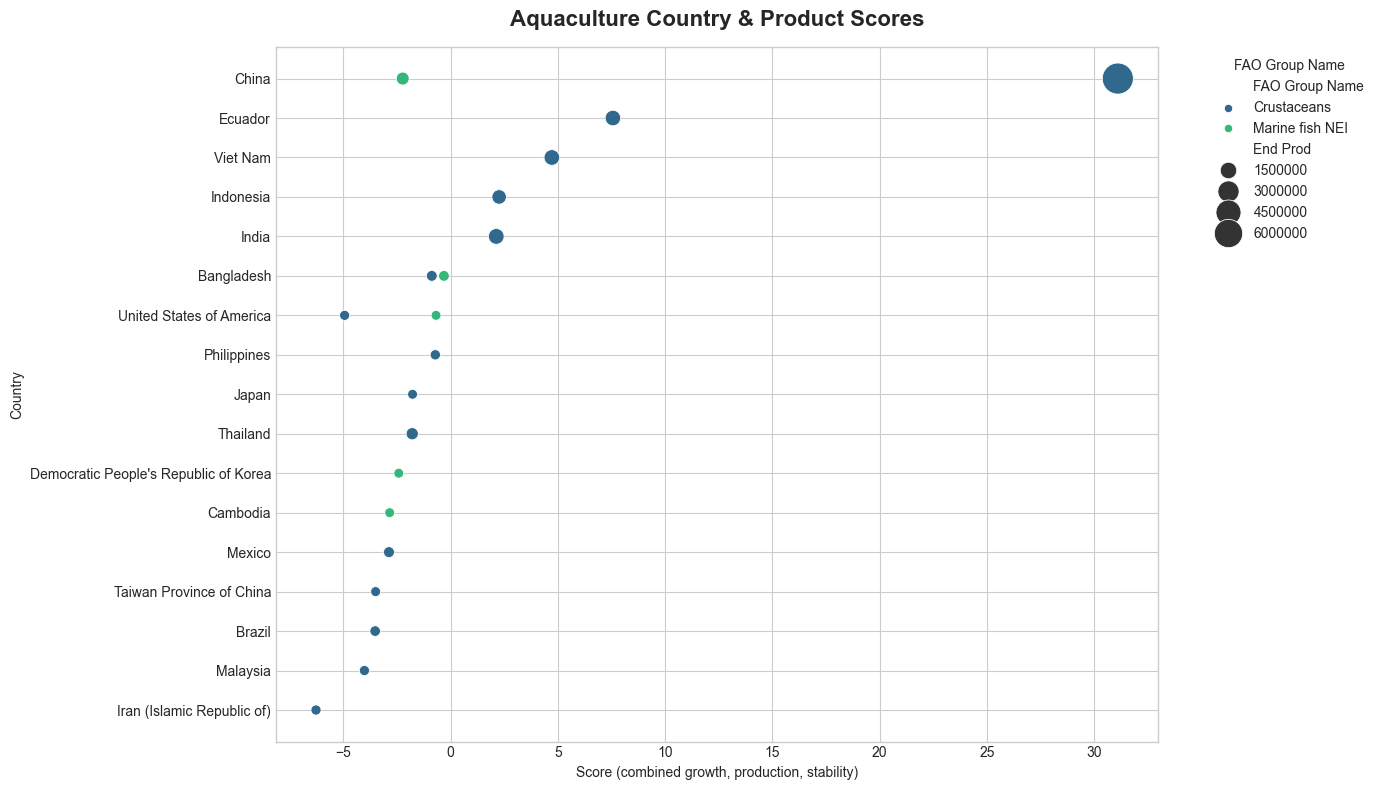

In [281]:
df_viz = df_summary_sorted.sort_values('Score', ascending=False).head(20)

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_viz,
    x="Score",
    y="Country",
    hue="FAO Group Name",
    size="End Prod",
    sizes=(50, 500),
    palette="viridis",
    legend="brief"
)

plt.title("Aquaculture Country & Product Scores", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Score (combined growth, production, stability)")
plt.ylabel("Country")
plt.legend(title="FAO Group Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

filename = "Aquaculture_Country_&_Product_Scores.png"
plt.savefig(filename, dpi=300)
plt.show()


The country that have a good score, or in this case top 20, i will see the composition of the production in the country, first i made a list

In [282]:
list_country_vizing = df_viz['Country'].to_list()
list_country_vizing

['China',
 'Ecuador',
 'Viet Nam',
 'Indonesia',
 'India',
 'Bangladesh',
 'United States of America',
 'Philippines',
 'Bangladesh',
 'Japan',
 'Thailand',
 'China',
 "Democratic People's Republic of Korea",
 'Cambodia',
 'Mexico',
 'Taiwan Province of China',
 'Brazil',
 'Malaysia',
 'United States of America',
 'Iran (Islamic Republic of)']

i test the code first with Indonesia

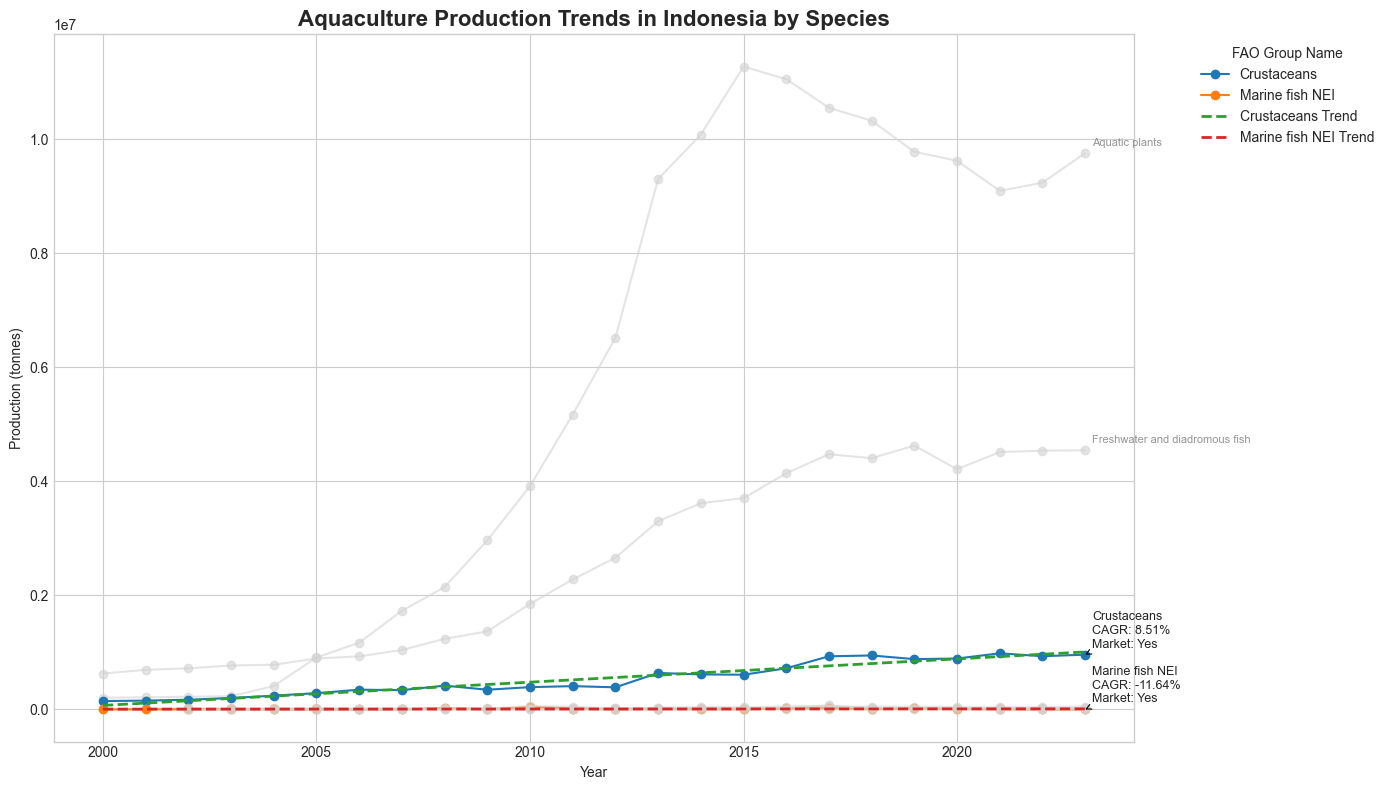

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,0.111238,2002,2023,25.000,229.028,No
1,Aquatic plants,0.182795,2000,2023,205227.000,9753410.490,No
2,Crustaceans,0.085081,2000,2023,146823.000,960334.721,Yes
3,Demersal fish,0.025001,2000,2023,11954.000,21094.450,No
4,Freshwater and diadromous fish,0.089773,2000,2023,629054.000,4543745.981,No
5,Marine fish NEI,-0.116377,2000,2023,669.000,38.866,Yes
6,Molluscs excl. cephalopods,0.552313,2002,2023,5.000,51231.133,No
7,Outside FAO Group Name,0.055035,2003,2023,2866.000,8367.805,No
8,Pelagic fish,0.334391,2021,2023,12901.812,22972.951,No


In [230]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# --- Choose target country ---
target_country = "Indonesia"

# --- Filter data ---
df_country = df_aqua[df_aqua['Country'] == target_country]

# --- Group and sum ---
df_species = (
    df_country.groupby(['Year', 'FAO Group Name'])['Production']
    .sum()
    .reset_index()
)

# --- Calculate CAGR ---
results = []
for species, group in df_species.groupby('FAO Group Name'):
    group = group.sort_values('Year')
    group_nonzero = group[(group['Production'] > 0) & (group['Production'].notna())]
    
    if len(group_nonzero) < 2:
        continue
    
    start_year = group_nonzero['Year'].iloc[0]
    end_year = group_nonzero['Year'].iloc[-1]
    start_val = group_nonzero['Production'].iloc[0]
    end_val = group_nonzero['Production'].iloc[-1]
    
    if start_val > 0 and end_year > start_year:
        cagr = (end_val / start_val) ** (1 / (end_year - start_year)) - 1
    else:
        cagr = 0
    
    results.append({
        'FAO Group Name': species,
        'CAGR': cagr,
        'Start Year': start_year,
        'End Year': end_year,
        'Start Prod': start_val,
        'End Prod': end_val
    })

df_c_species_cagr = pd.DataFrame(results)

# --- Mark our product market ---
high_value = ["Crustaceans", "Marine fish NEI"]
df_c_species_cagr['My Product Market?'] = df_c_species_cagr['FAO Group Name'].apply(
    lambda x: 'Yes' if x in high_value else 'No'
)

# --- Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

gray_labels = []

for species in df_species['FAO Group Name'].unique():
    subset = df_species[df_species['FAO Group Name'] == species]
    
    if species in high_value:
        plt.plot(subset['Year'], subset['Production'], marker='o', label=species)
    else:
        line, = plt.plot(
            subset['Year'], subset['Production'], color='lightgray',
            marker='o', linestyle='-', alpha=0.6
        )
        gray_labels.append((species, subset))

# --- Trend lines + annotations for product market ---
for species in high_value:
    subset = df_species[df_species['FAO Group Name'] == species]
    if len(subset) >= 2:
        X = subset['Year'].values.reshape(-1, 1)
        y = subset['Production'].values
        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)
        plt.plot(subset['Year'], y_pred, linestyle='--', linewidth=2, label=f"{species} Trend")
    
    row = df_c_species_cagr[df_c_species_cagr['FAO Group Name'] == species].iloc[0]
    plt.annotate(
        f"{species}\nCAGR: {row['CAGR']*100:.2f}%\nMarket: Yes",
        xy=(row['End Year'], row['End Prod']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        arrowprops=dict(arrowstyle='->', lw=0.8)
    )

# --- Subtle labels for dominant gray species ---
for species, subset in gray_labels:
    if subset['Production'].max() > df_species['Production'].quantile(0.75):
        end_row = subset[subset['Year'] == subset['Year'].max()]
        plt.annotate(
            species,
            xy=(end_row['Year'].values[0], end_row['Production'].values[0]),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8,
            color='dimgray',
            alpha=0.7
        )

# --- Final touches ---
plt.title(f"Aquaculture Production Trends in {target_country} by Species", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Production (tonnes)")
plt.legend(title="FAO Group Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Show table ---
display(df_c_species_cagr)


this where i looping using the list we create before

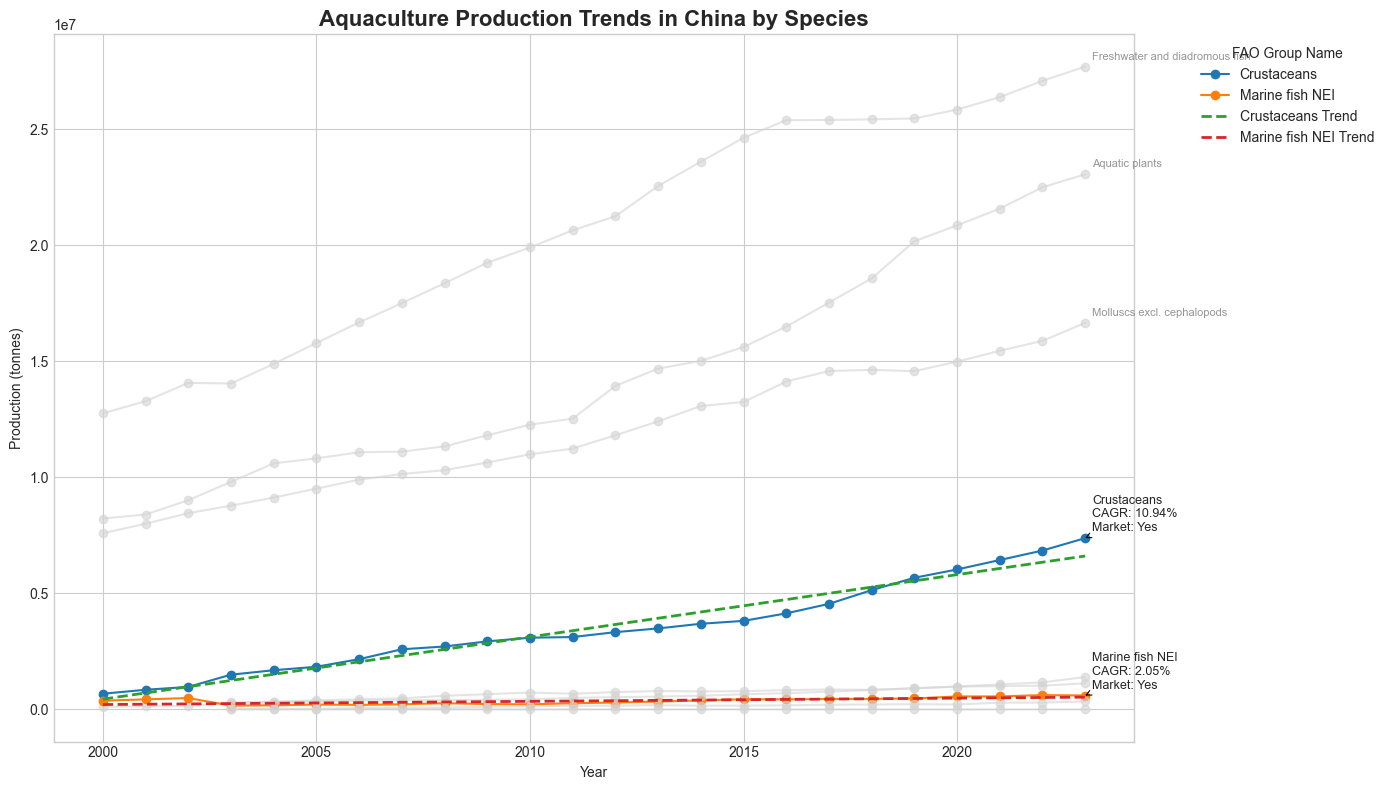

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,0.116583,2000,2023,110566.0,1.396738e+06,No
1,Aquatic plants,0.045836,2000,2023,8227613.0,2.306388e+07,No
2,Crustaceans,0.109449,2000,2023,677315.0,7.383530e+06,Yes
3,Demersal fish,0.074632,2003,2023,266250.0,1.123279e+06,No
4,Freshwater and diadromous fish,0.034270,2000,2023,12763402.0,2.770409e+07,No
5,Marine fish NEI,0.020505,2000,2023,376709.0,6.008280e+05,Yes
6,Molluscs excl. cephalopods,0.034746,2000,2023,7594103.0,1.665901e+07,No
7,Outside FAO Group Name,0.183609,2003,2023,26.0,7.570690e+02,No
8,Pelagic fish,0.141220,2003,2023,24559.0,3.448250e+05,No


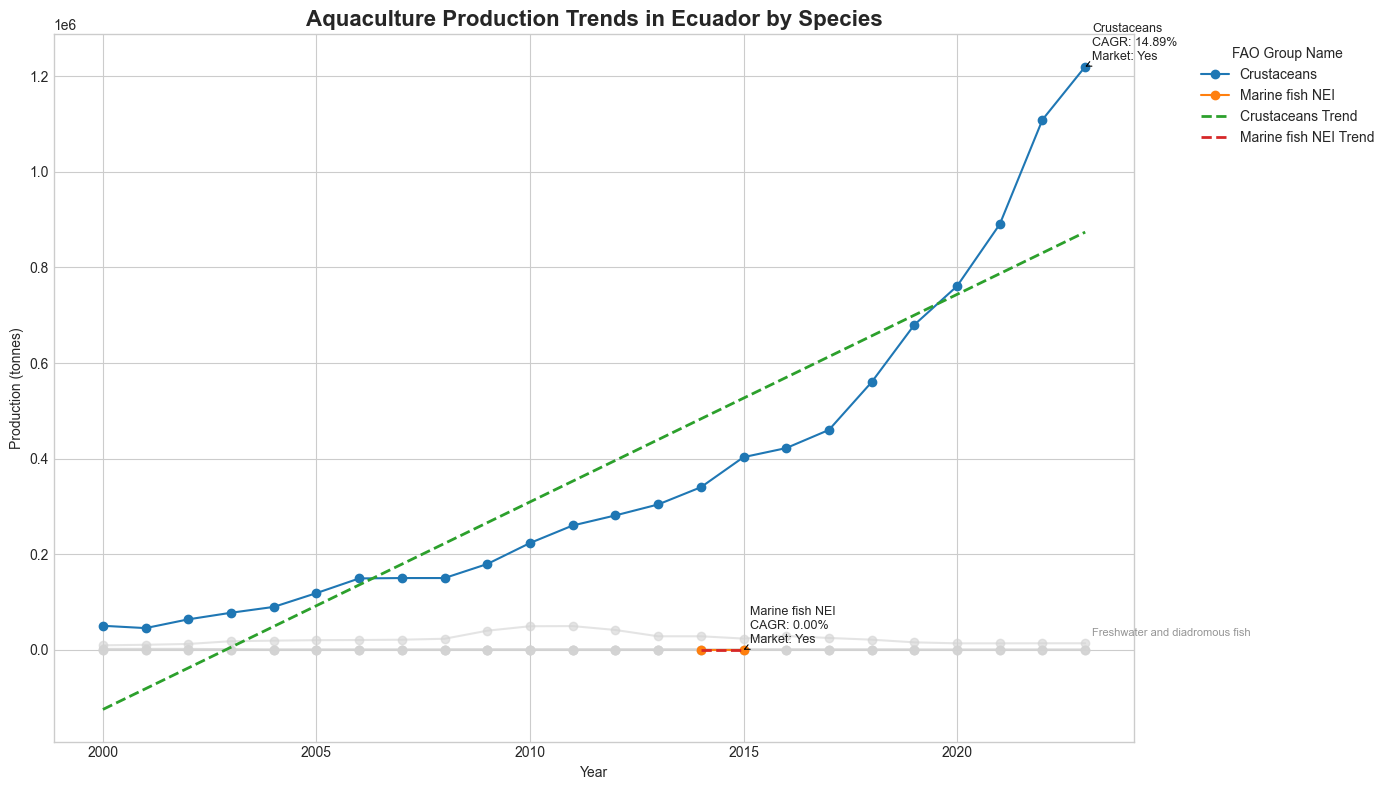

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,-0.018996,2008,2023,200.00,150.0,No
1,Aquatic plants,0.123723,2014,2023,35.00,100.0,No
2,Crustaceans,0.148872,2000,2023,50140.00,1220200.0,Yes
3,Demersal fish,0.000000,2000,2002,1894.00,1894.0,No
4,Freshwater and diadromous fish,0.016641,2000,2023,9277.00,13560.0,No
5,Marine fish NEI,0.000000,2014,2015,5.00,5.0,Yes
6,Molluscs excl. cephalopods,0.309618,2010,2023,2.34,78.0,No
7,Pelagic fish,0.000000,2015,2017,50.00,50.0,No


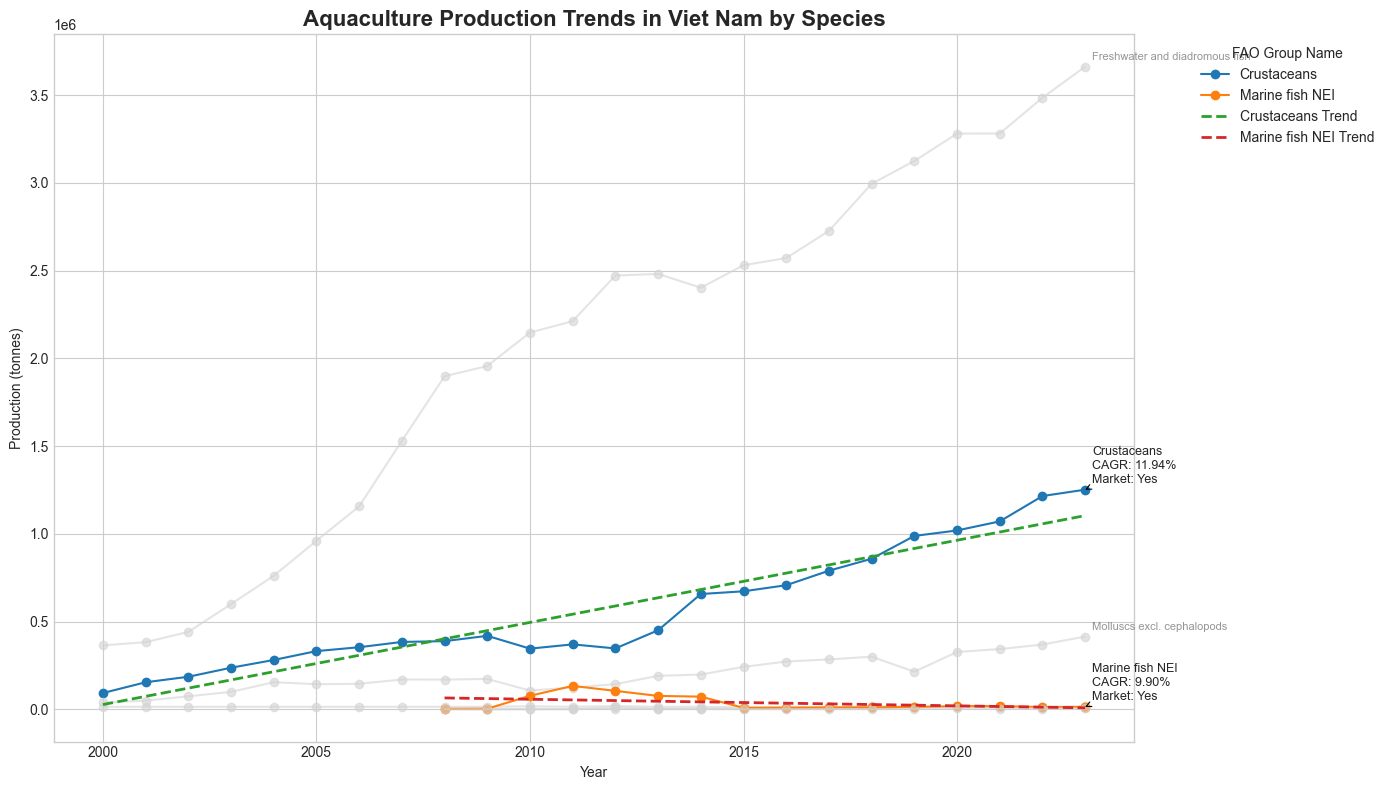

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,0.529373,2008,2023,30.0,17572.123,No
1,Aquatic plants,-0.014447,2000,2023,15000.0,10733.344,No
2,Crustaceans,0.119420,2000,2023,93502.0,1252162.652,Yes
3,Freshwater and diadromous fish,0.105455,2000,2023,365015.0,3662313.307,No
4,Marine fish NEI,0.098972,2008,2023,3500.0,14416.844,Yes
5,Molluscs excl. cephalopods,0.107096,2000,2023,40000.0,415260.583,No
6,Pelagic fish,0.101563,2008,2023,1500.0,6400.779,No


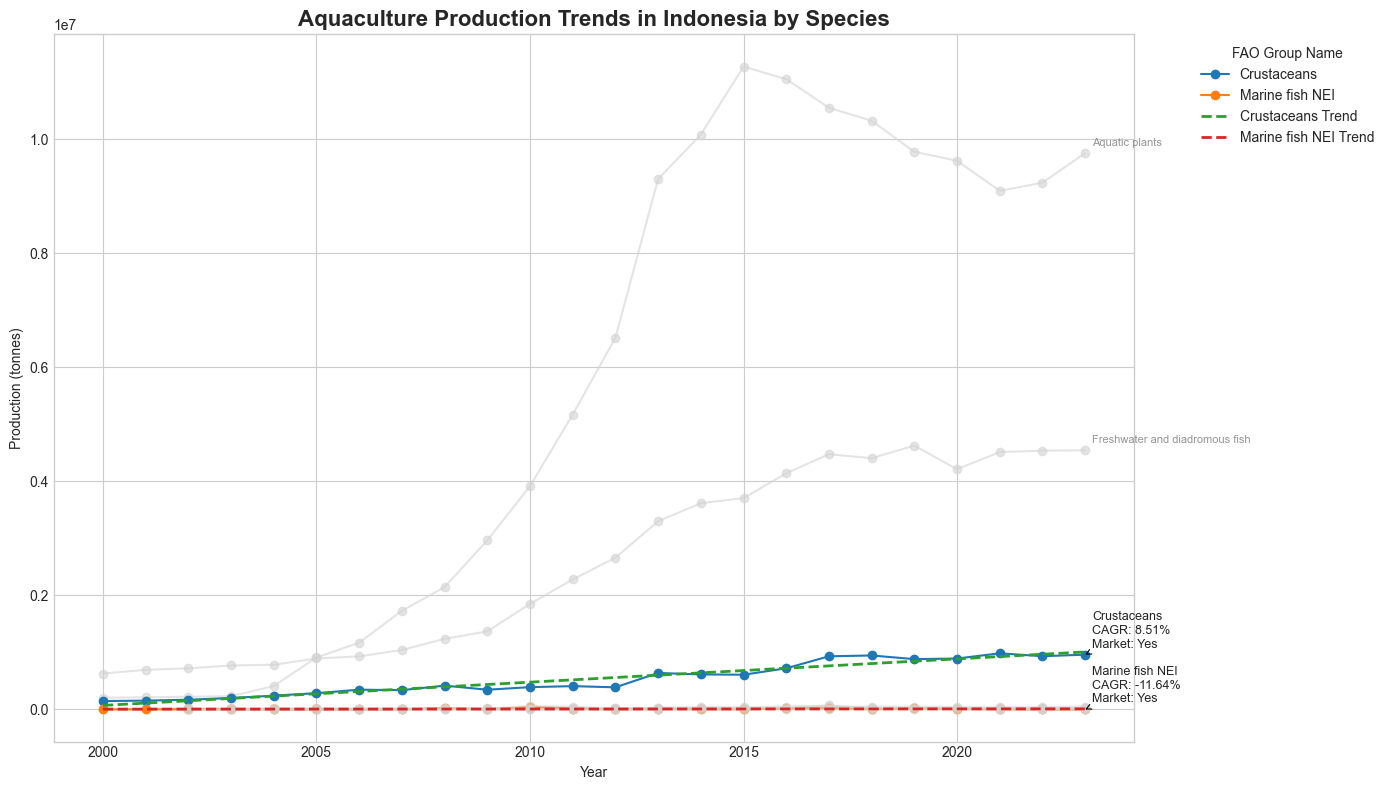

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,0.111238,2002,2023,25.000,229.028,No
1,Aquatic plants,0.182795,2000,2023,205227.000,9753410.490,No
2,Crustaceans,0.085081,2000,2023,146823.000,960334.721,Yes
3,Demersal fish,0.025001,2000,2023,11954.000,21094.450,No
4,Freshwater and diadromous fish,0.089773,2000,2023,629054.000,4543745.981,No
5,Marine fish NEI,-0.116377,2000,2023,669.000,38.866,Yes
6,Molluscs excl. cephalopods,0.552313,2002,2023,5.000,51231.133,No
7,Outside FAO Group Name,0.055035,2003,2023,2866.000,8367.805,No
8,Pelagic fish,0.334391,2021,2023,12901.812,22972.951,No


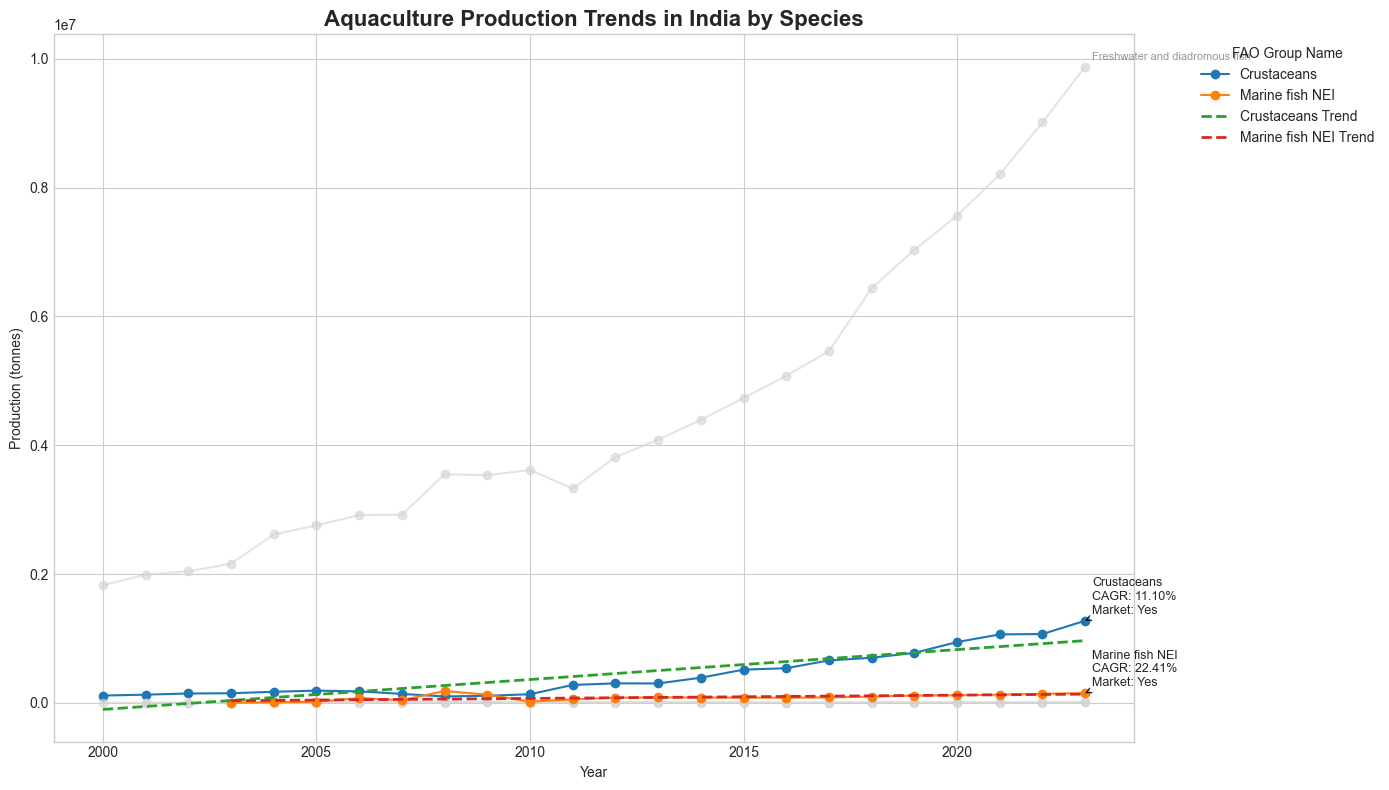

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic plants,0.173962,2001,2023,168.0,5724.0,No
1,Crustaceans,0.110985,2000,2023,113315.0,1275190.0,Yes
2,Freshwater and diadromous fish,0.076120,2000,2023,1827636.0,9878365.0,No
3,Marine fish NEI,0.224103,2003,2023,2644.0,150876.0,Yes
4,Molluscs excl. cephalopods,0.087892,2000,2023,1580.0,10968.0,No


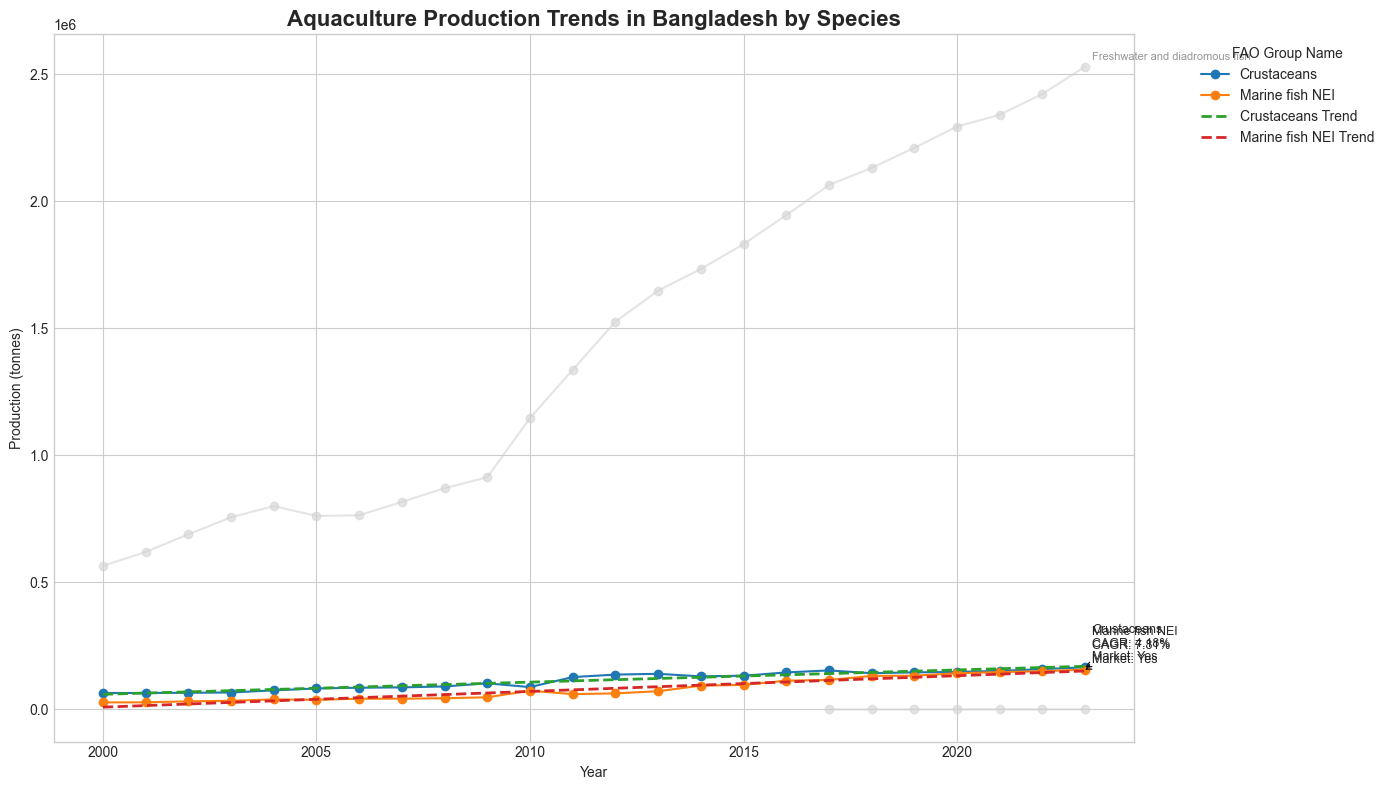

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic plants,0.479784,2017,2023,50.0,525.0,No
1,Crustaceans,0.041837,2000,2023,64647.0,165937.0,Yes
2,Freshwater and diadromous fish,0.067367,2000,2023,564672.0,2529359.0,No
3,Marine fish NEI,0.078099,2000,2023,27801.0,156751.0,Yes


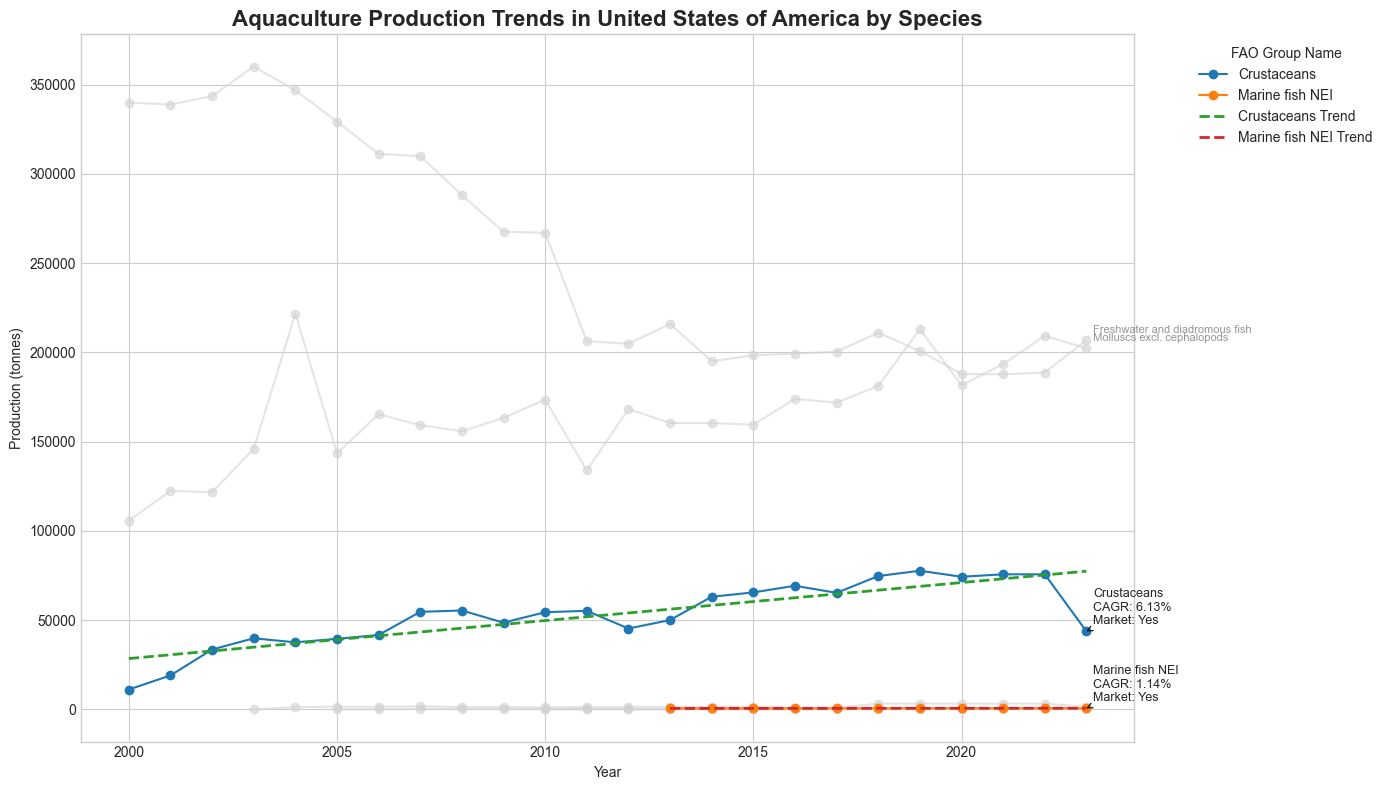

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic plants,0.165714,2010,2023,100.0,734.000,No
1,Crustaceans,0.061253,2000,2023,11149.0,43759.222,Yes
2,Demersal fish,0.279867,2003,2023,11.0,1530.000,No
3,Freshwater and diadromous fish,-0.021360,2000,2023,339992.0,206915.889,No
4,Marine fish NEI,0.011397,2013,2023,600.0,672.000,Yes
5,Molluscs excl. cephalopods,0.028643,2000,2023,105689.0,202356.400,No
6,Pelagic fish,0.163990,2005,2023,26.0,400.000,No


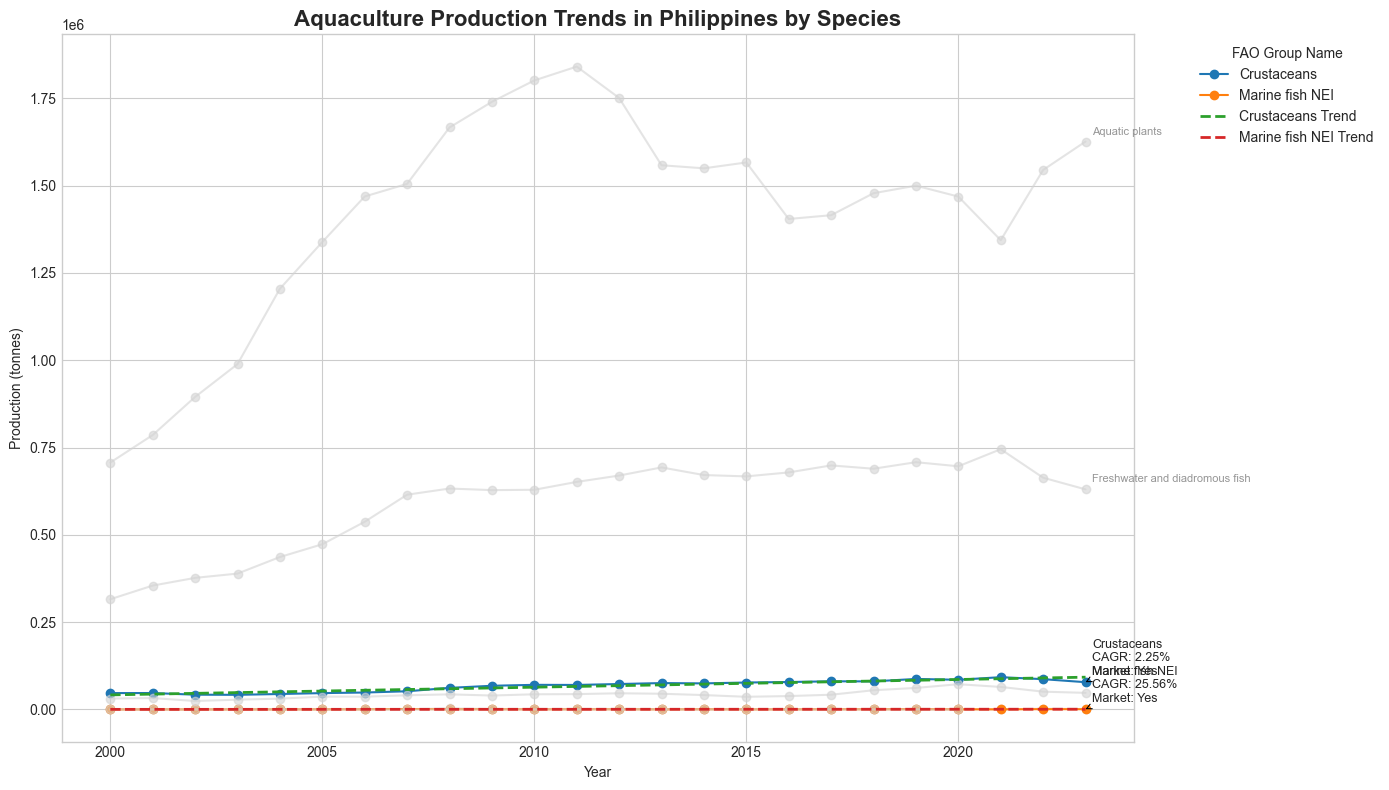

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic plants,0.036879,2000,2023,707039.0,1626245.114,No
1,Crustaceans,0.022467,2000,2023,46819.0,78047.263,Yes
2,Demersal fish,0.074123,2000,2023,249.0,1289.559,No
3,Freshwater and diadromous fish,0.030524,2000,2023,315599.0,630191.692,No
4,Marine fish NEI,0.255556,2000,2023,4.0,750.397,Yes
5,Molluscs excl. cephalopods,0.018472,2000,2023,31179.0,47499.363,No
6,Pelagic fish,0.029858,2000,2020,13.0,23.415,No


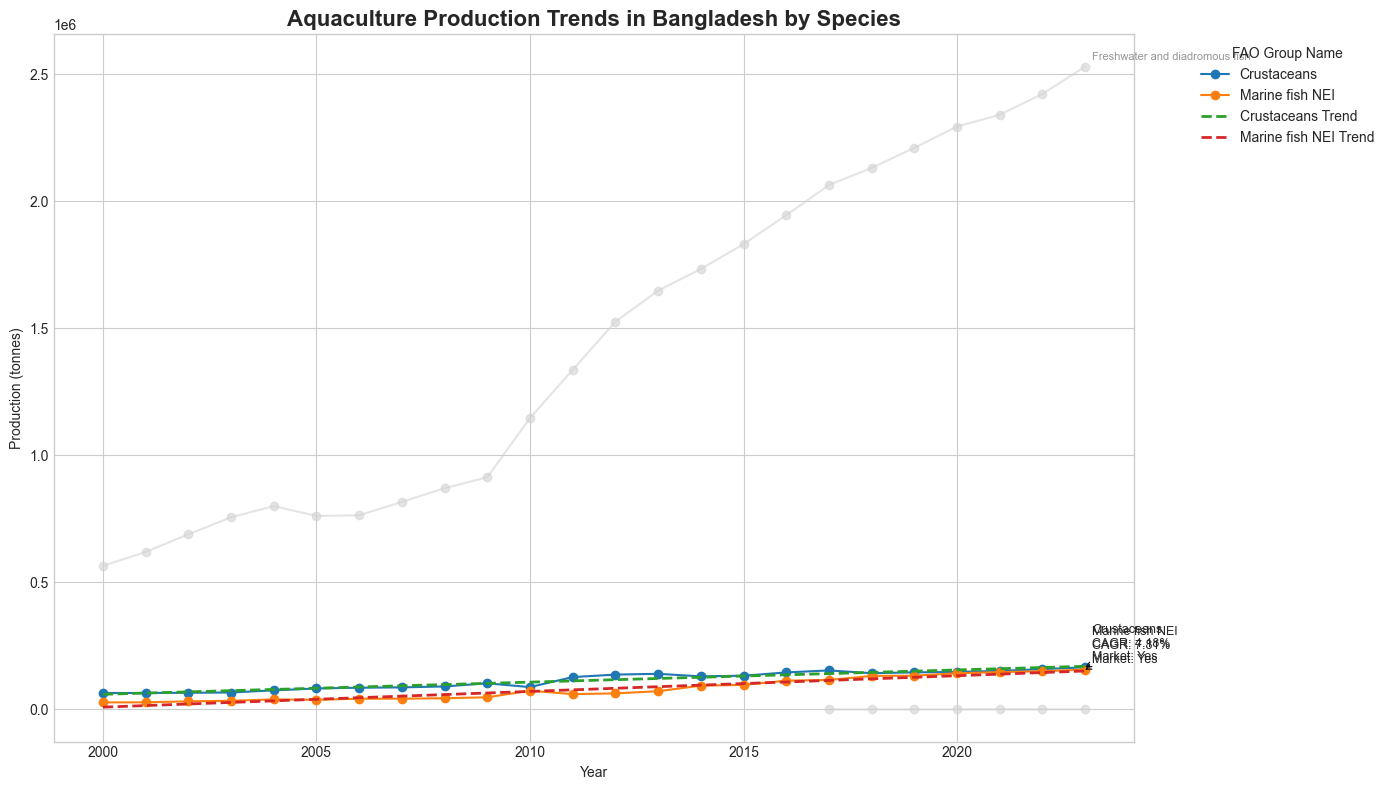

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic plants,0.479784,2017,2023,50.0,525.0,No
1,Crustaceans,0.041837,2000,2023,64647.0,165937.0,Yes
2,Freshwater and diadromous fish,0.067367,2000,2023,564672.0,2529359.0,No
3,Marine fish NEI,0.078099,2000,2023,27801.0,156751.0,Yes


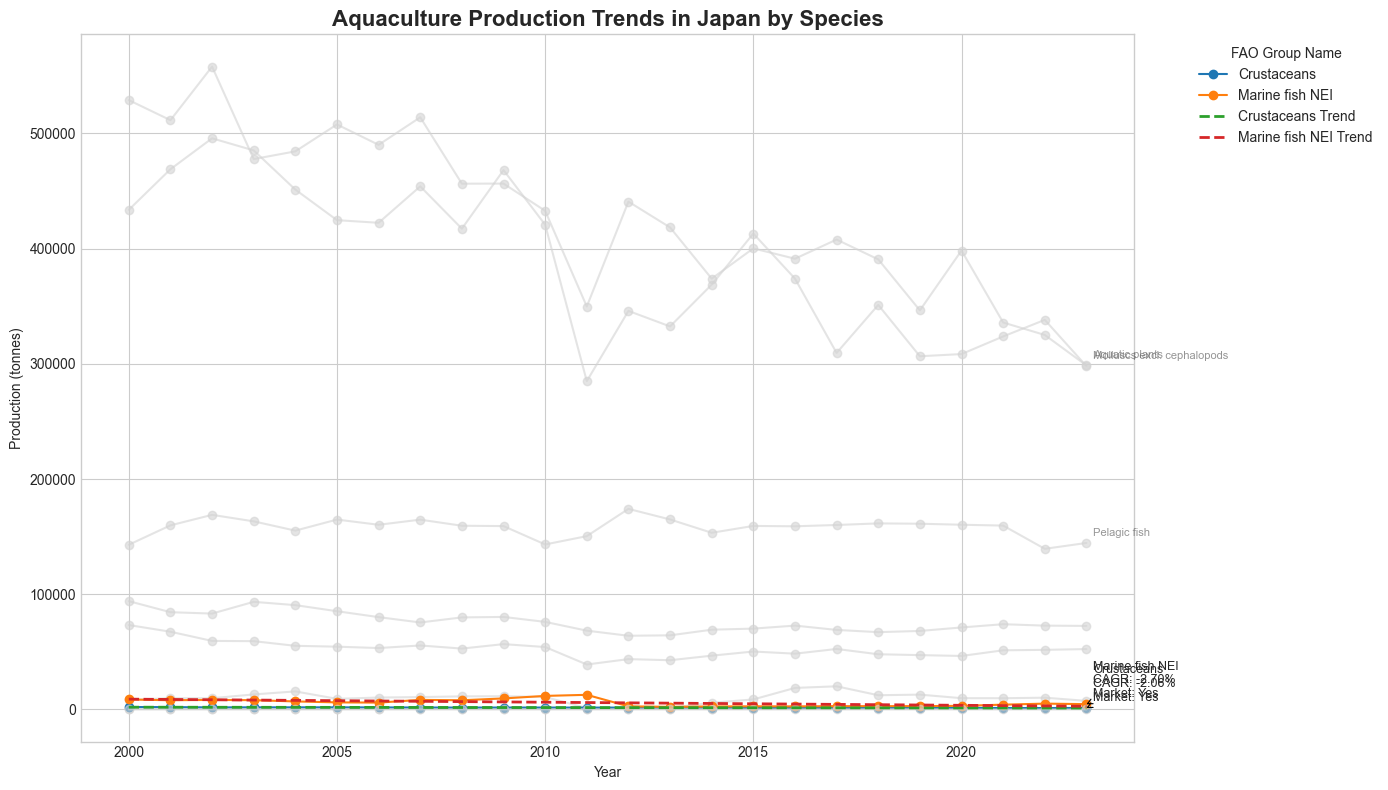

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,-0.004420,2000,2023,8249.000,7450.0,No
1,Aquatic plants,-0.024548,2000,2023,528881.000,298600.0,No
2,Crustaceans,-0.020595,2000,2023,2098.000,1300.0,Yes
3,Demersal fish,-0.011224,2000,2023,93991.000,72500.0,No
4,Freshwater and diadromous fish,-0.014458,2000,2023,73248.000,52399.0,No
5,Marine fish NEI,-0.026990,2000,2023,8631.000,4600.0,Yes
6,Molluscs excl. cephalopods,-0.016180,2000,2023,433663.000,298000.0,No
7,Outside FAO Group Name,-0.038828,2000,2023,30.086,12.1,No
8,Pelagic fish,0.000471,2000,2023,142944.000,144500.0,No


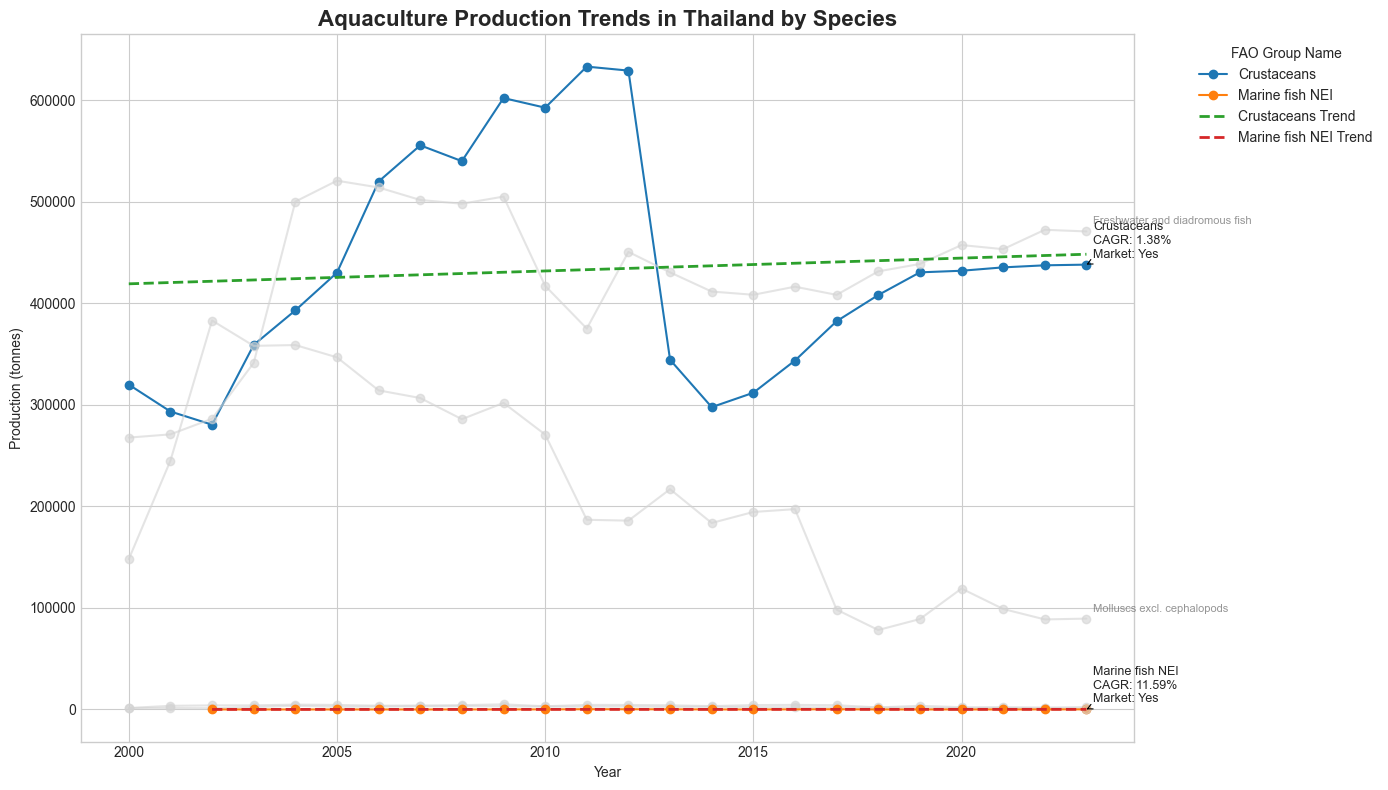

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,0.022184,2000,2023,1400.0,2319.0,No
1,Crustaceans,0.013763,2000,2023,319788.0,437925.0,Yes
2,Demersal fish,-0.021025,2000,2023,1358.0,833.0,No
3,Freshwater and diadromous fish,0.024843,2000,2023,267637.0,470609.0,No
4,Marine fish NEI,0.115884,2002,2023,10.0,100.0,Yes
5,Molluscs excl. cephalopods,-0.021657,2000,2023,147972.0,89428.0,No


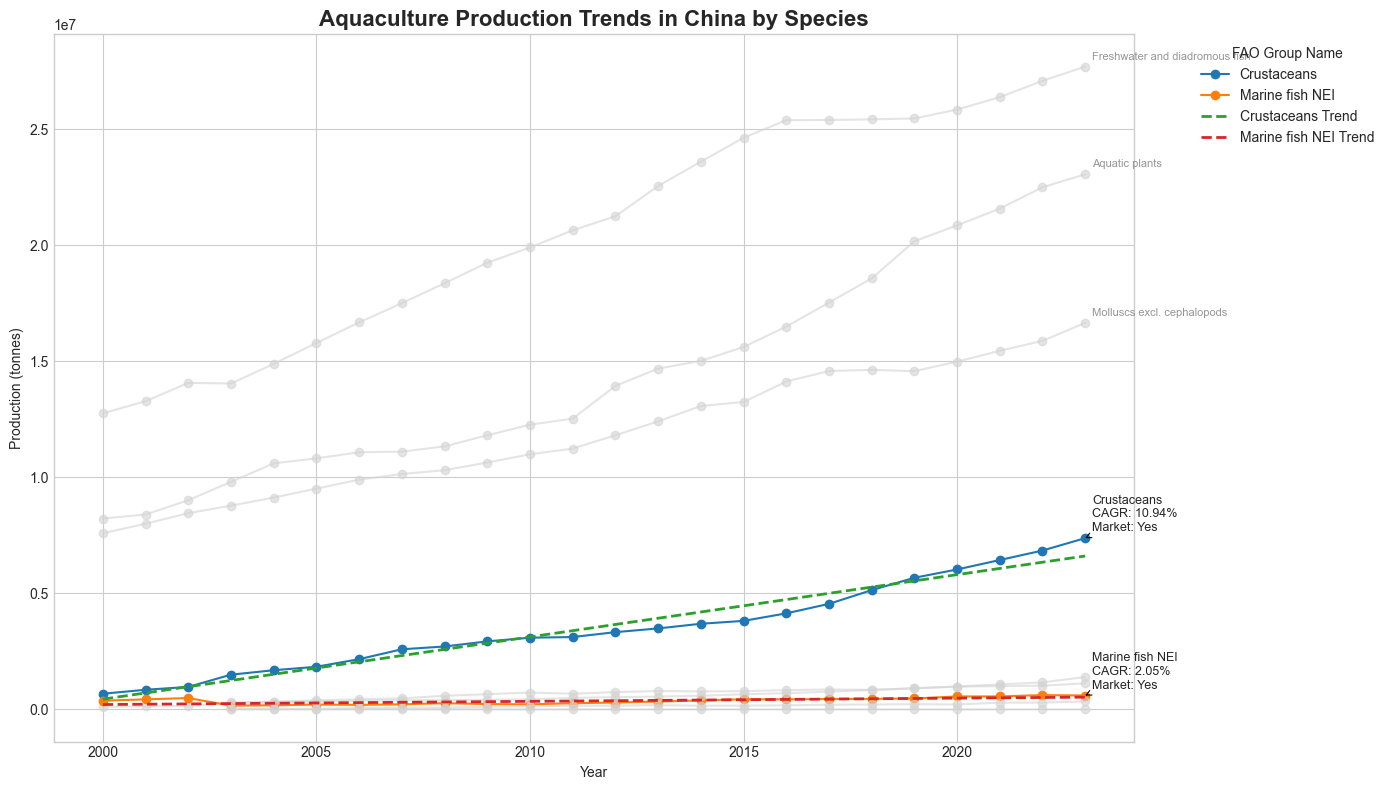

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,0.116583,2000,2023,110566.0,1.396738e+06,No
1,Aquatic plants,0.045836,2000,2023,8227613.0,2.306388e+07,No
2,Crustaceans,0.109449,2000,2023,677315.0,7.383530e+06,Yes
3,Demersal fish,0.074632,2003,2023,266250.0,1.123279e+06,No
4,Freshwater and diadromous fish,0.034270,2000,2023,12763402.0,2.770409e+07,No
5,Marine fish NEI,0.020505,2000,2023,376709.0,6.008280e+05,Yes
6,Molluscs excl. cephalopods,0.034746,2000,2023,7594103.0,1.665901e+07,No
7,Outside FAO Group Name,0.183609,2003,2023,26.0,7.570690e+02,No
8,Pelagic fish,0.141220,2003,2023,24559.0,3.448250e+05,No


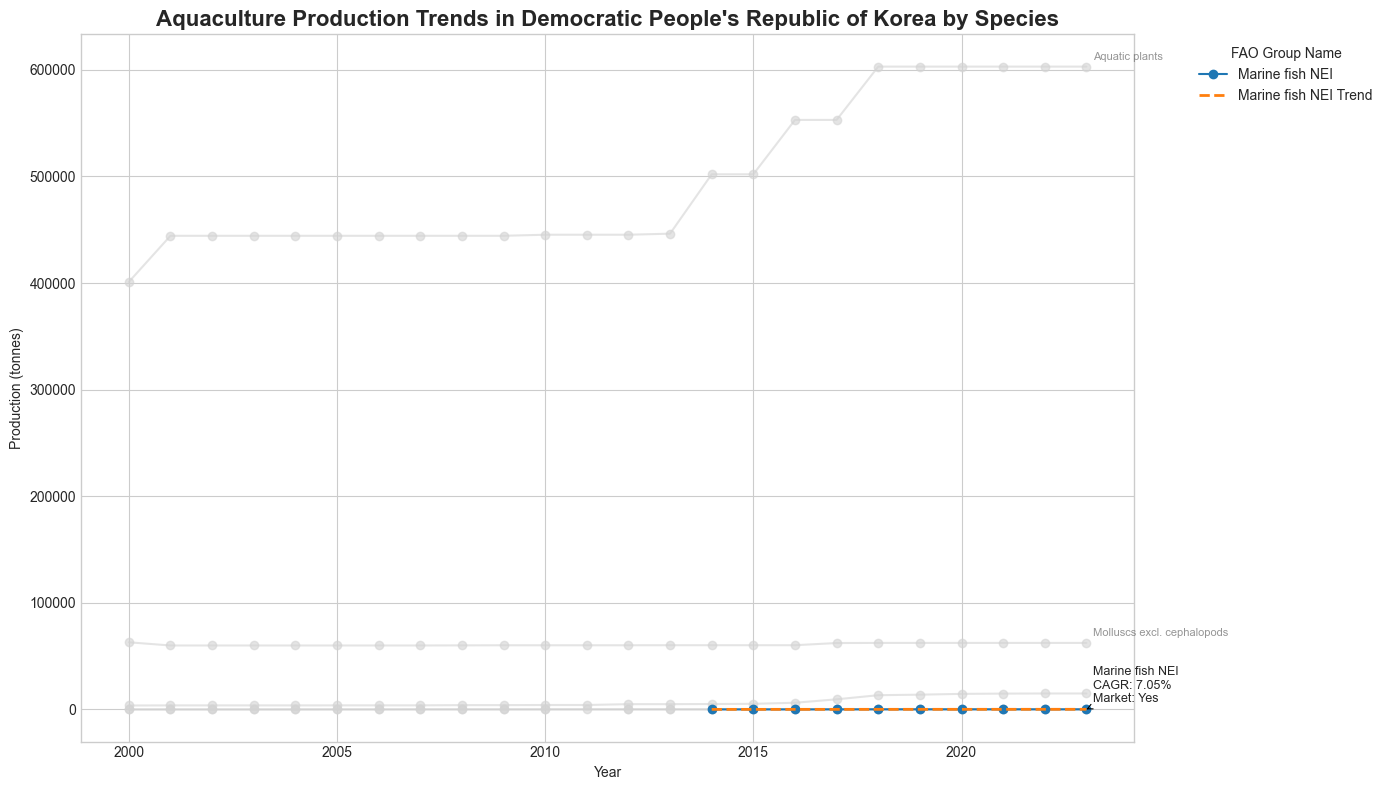

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,0.169221,2004,2023,10.0,195.0,No
1,Aquatic plants,0.017895,2000,2023,401000.0,603000.0,No
2,Demersal fish,0.105032,2012,2023,5.0,15.0,No
3,Freshwater and diadromous fish,0.062655,2000,2023,3700.0,14970.0,No
4,Marine fish NEI,0.070497,2014,2023,65.0,120.0,Yes
5,Molluscs excl. cephalopods,-0.000416,2000,2023,63000.0,62400.0,No


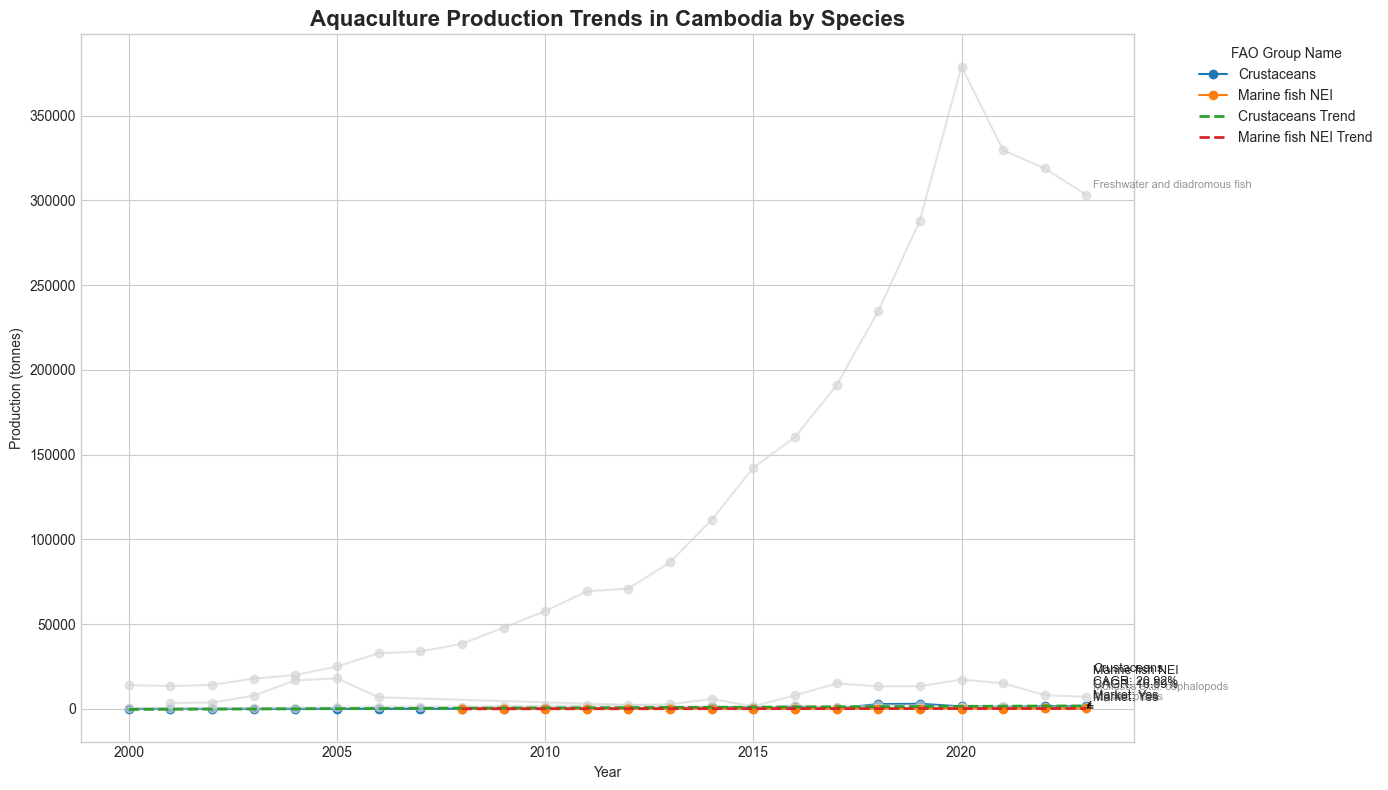

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,0.148698,2008,2023,50.0,400.0,No
1,Aquatic plants,-0.055353,2001,2023,3500.0,1000.0,No
2,Crustaceans,0.209221,2000,2023,20.0,1580.0,Yes
3,Demersal fish,0.062990,2008,2023,160.0,400.0,No
4,Freshwater and diadromous fish,0.143066,2000,2023,14002.0,303270.0,No
5,Marine fish NEI,0.165914,2008,2023,25.0,250.0,Yes
6,Molluscs excl. cephalopods,0.132241,2000,2023,408.0,7100.0,No


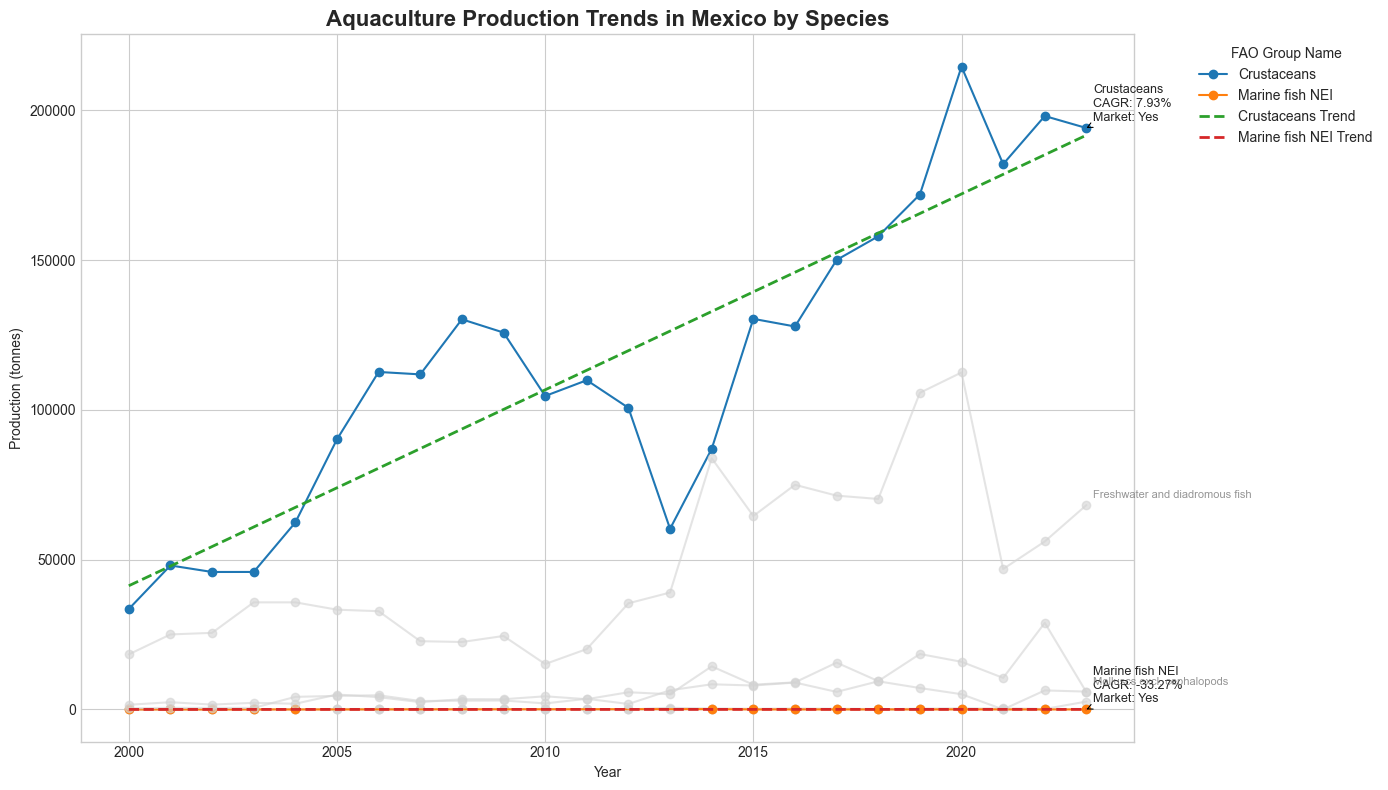

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,-0.006131,2000,2023,75.000,65.107,No
1,Aquatic plants,-0.338965,2014,2022,5.760,0.210,No
2,Crustaceans,0.079330,2000,2023,33530.000,194081.961,Yes
3,Demersal fish,0.408302,2000,2023,1.000,2630.302,No
4,Freshwater and diadromous fish,0.058680,2000,2023,18378.000,68216.232,No
5,Marine fish NEI,-0.332686,2014,2023,108.001,2.834,Yes
6,Molluscs excl. cephalopods,0.058124,2000,2023,1568.000,5750.213,No
7,Pelagic fish,0.128936,2000,2023,366.000,5954.878,No


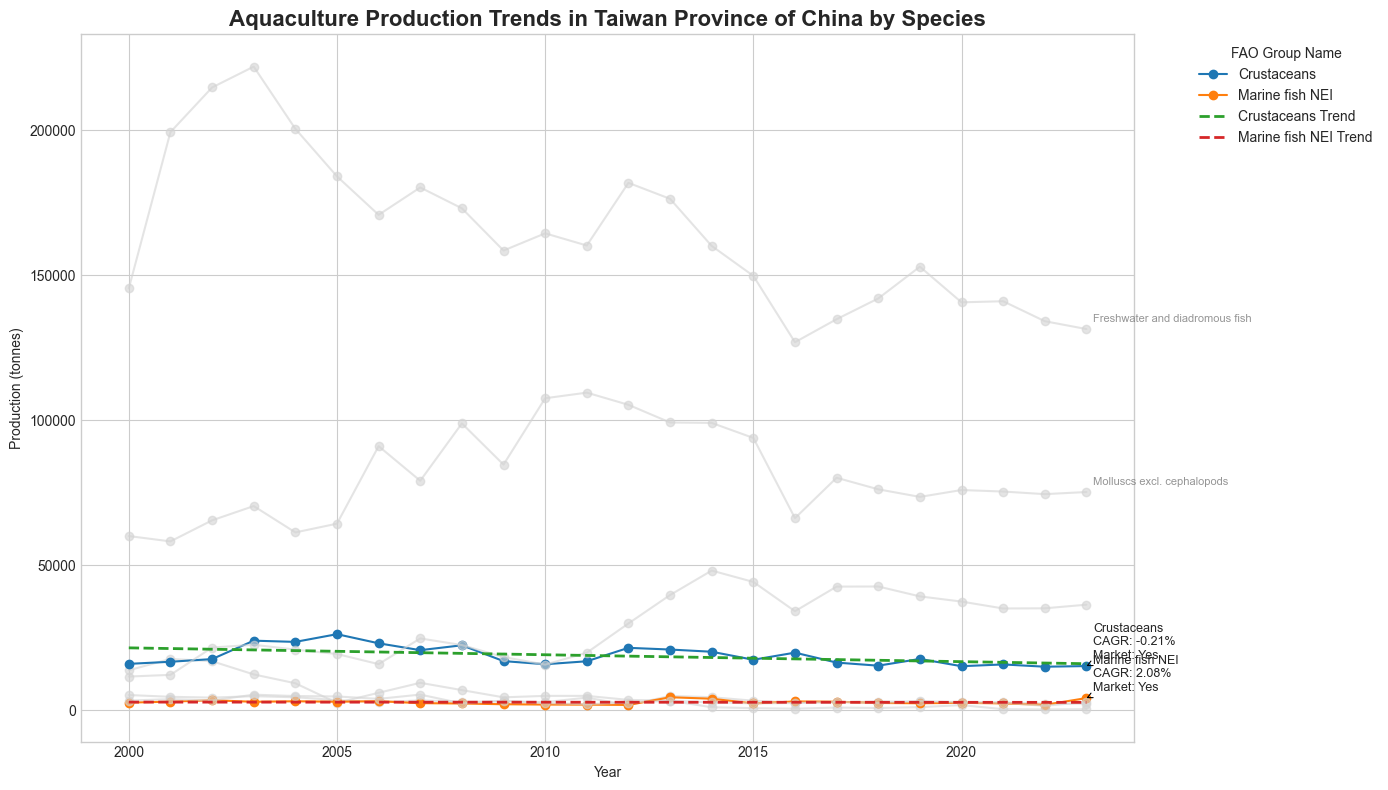

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,-0.036971,2000,2023,5180.0,2177.879,No
1,Aquatic plants,-0.152918,2000,2023,13714.0,301.615,No
2,Crustaceans,-0.002124,2000,2023,15923.0,15162.931,Yes
3,Demersal fish,0.051093,2000,2023,11548.0,36328.712,No
4,Freshwater and diadromous fish,-0.004395,2000,2023,145380.0,131373.105,No
5,Marine fish NEI,0.020757,2000,2023,2572.0,4125.571,Yes
6,Molluscs excl. cephalopods,0.009858,2000,2023,59994.0,75178.063,No
7,Pelagic fish,-0.006773,2000,2023,3259.0,2787.410,No


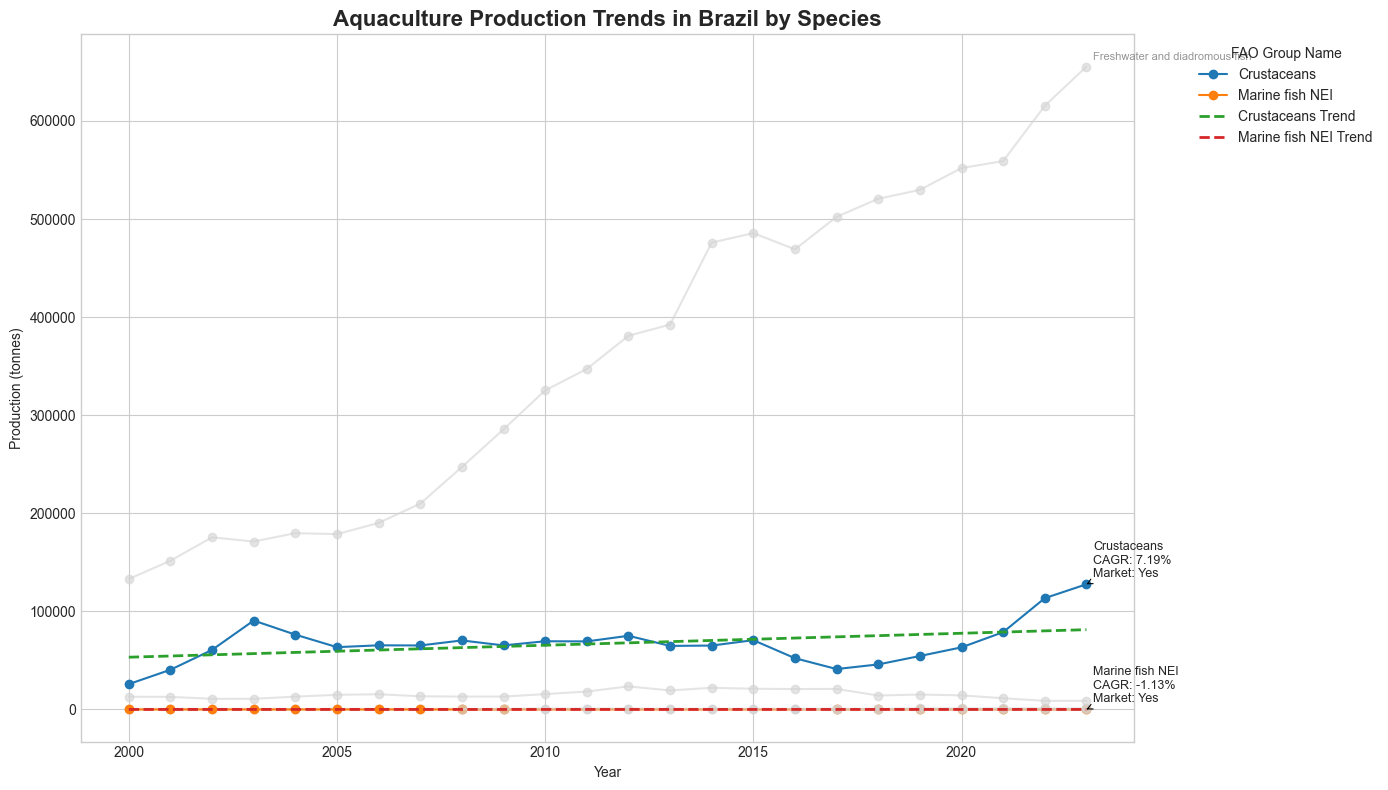

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,-0.050187,2000,2023,670.0,205.000,No
1,Aquatic plants,0.085799,2008,2023,320.0,1100.000,No
2,Crustaceans,0.071911,2000,2023,25838.0,127616.000,Yes
3,Demersal fish,-0.370039,2000,2003,20.0,5.000,No
4,Freshwater and diadromous fish,0.071820,2000,2023,132955.0,655395.871,No
5,Marine fish NEI,-0.011342,2000,2023,13.0,10.000,Yes
6,Molluscs excl. cephalopods,-0.016870,2000,2023,12954.0,8759.000,No
7,Pelagic fish,0.104090,2016,2023,5.0,10.000,No


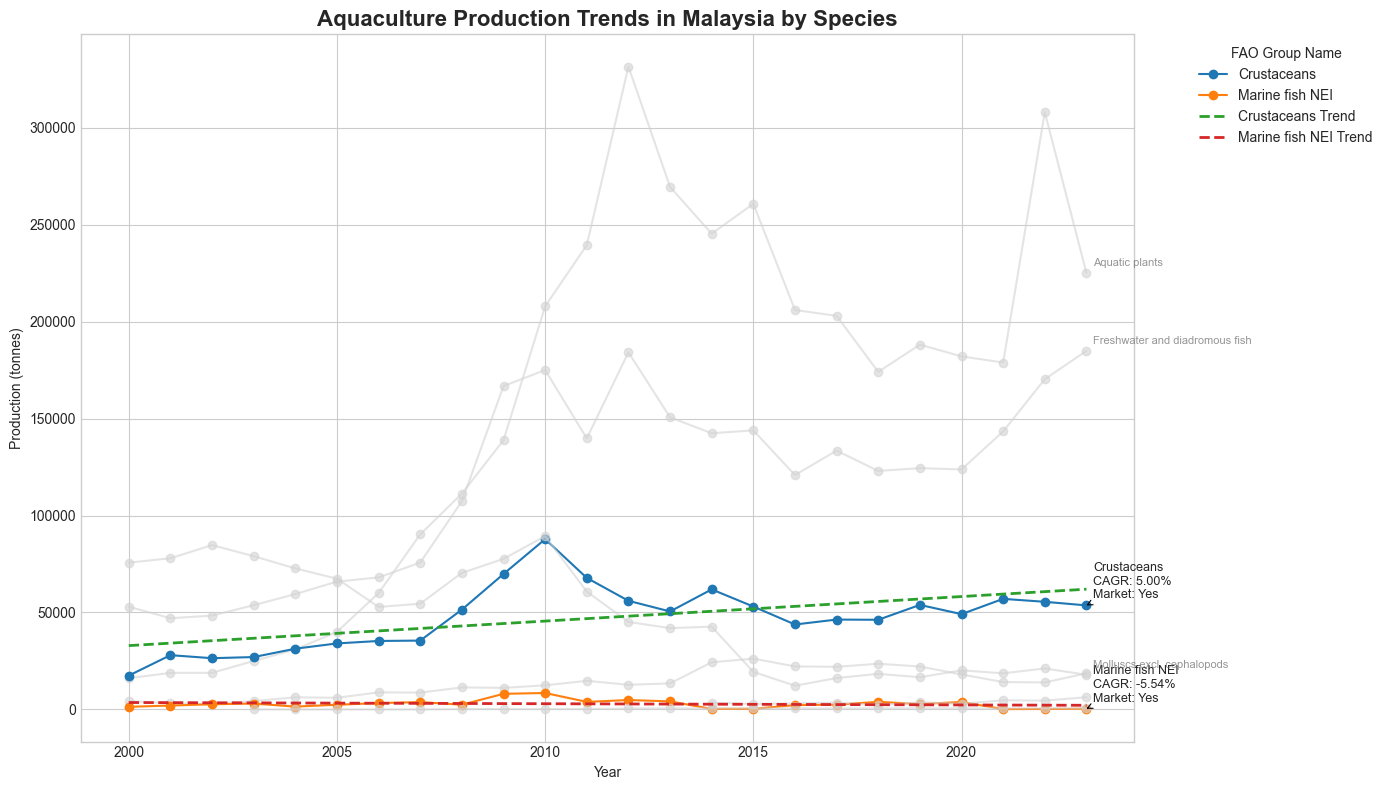

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic animals NEI,0.067900,2008,2023,200.00,535.78,No
1,Aquatic plants,0.121440,2000,2023,16125.00,225086.44,No
2,Crustaceans,0.050030,2000,2023,17457.00,53655.12,Yes
3,Demersal fish,0.065862,2000,2023,4302.00,18655.06,No
4,Freshwater and diadromous fish,0.055853,2000,2023,52974.00,184900.75,No
5,Marine fish NEI,-0.055353,2000,2023,1343.00,362.47,Yes
6,Molluscs excl. cephalopods,-0.060828,2000,2023,75697.00,17873.71,No
7,Pelagic fish,0.067378,2014,2023,3502.29,6298.20,No


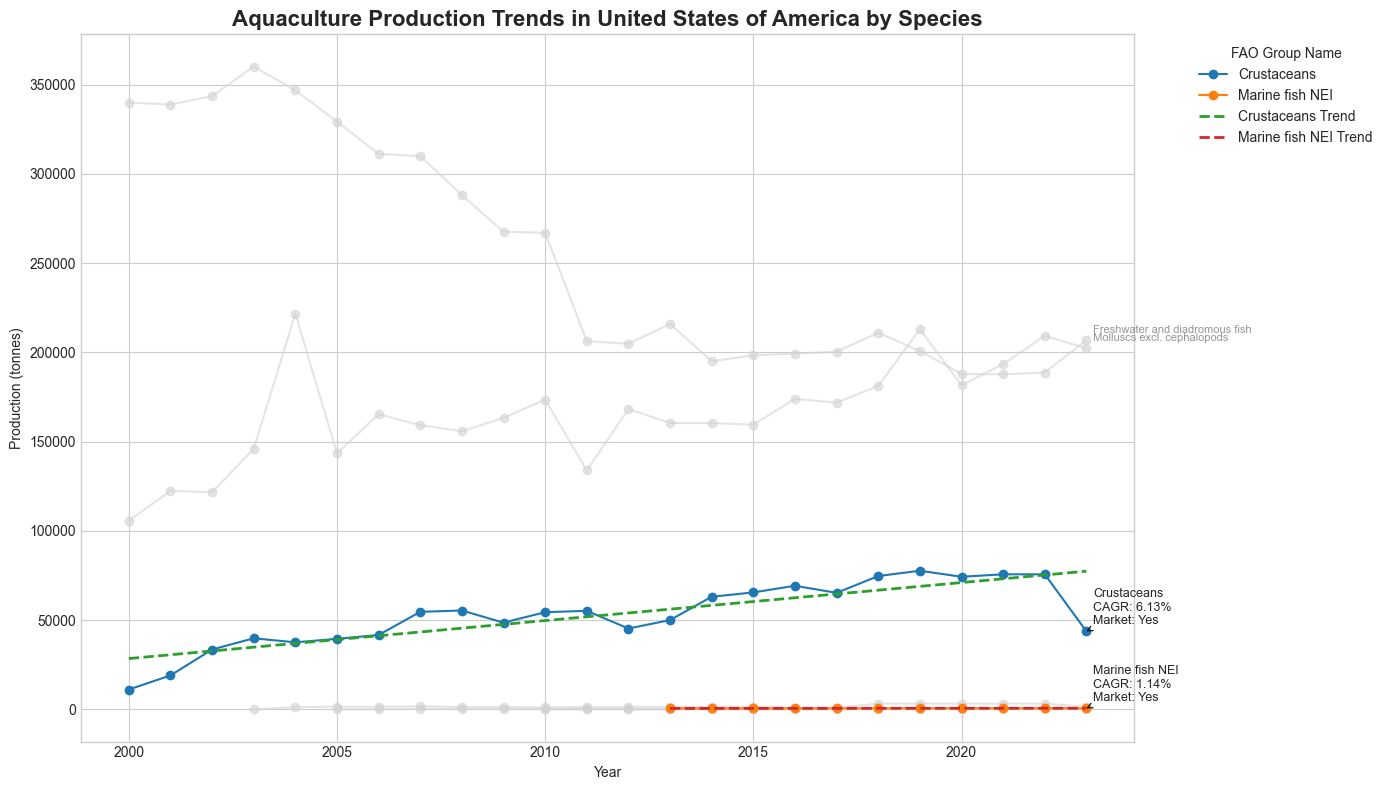

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Aquatic plants,0.165714,2010,2023,100.0,734.000,No
1,Crustaceans,0.061253,2000,2023,11149.0,43759.222,Yes
2,Demersal fish,0.279867,2003,2023,11.0,1530.000,No
3,Freshwater and diadromous fish,-0.021360,2000,2023,339992.0,206915.889,No
4,Marine fish NEI,0.011397,2013,2023,600.0,672.000,Yes
5,Molluscs excl. cephalopods,0.028643,2000,2023,105689.0,202356.400,No
6,Pelagic fish,0.163990,2005,2023,26.0,400.000,No


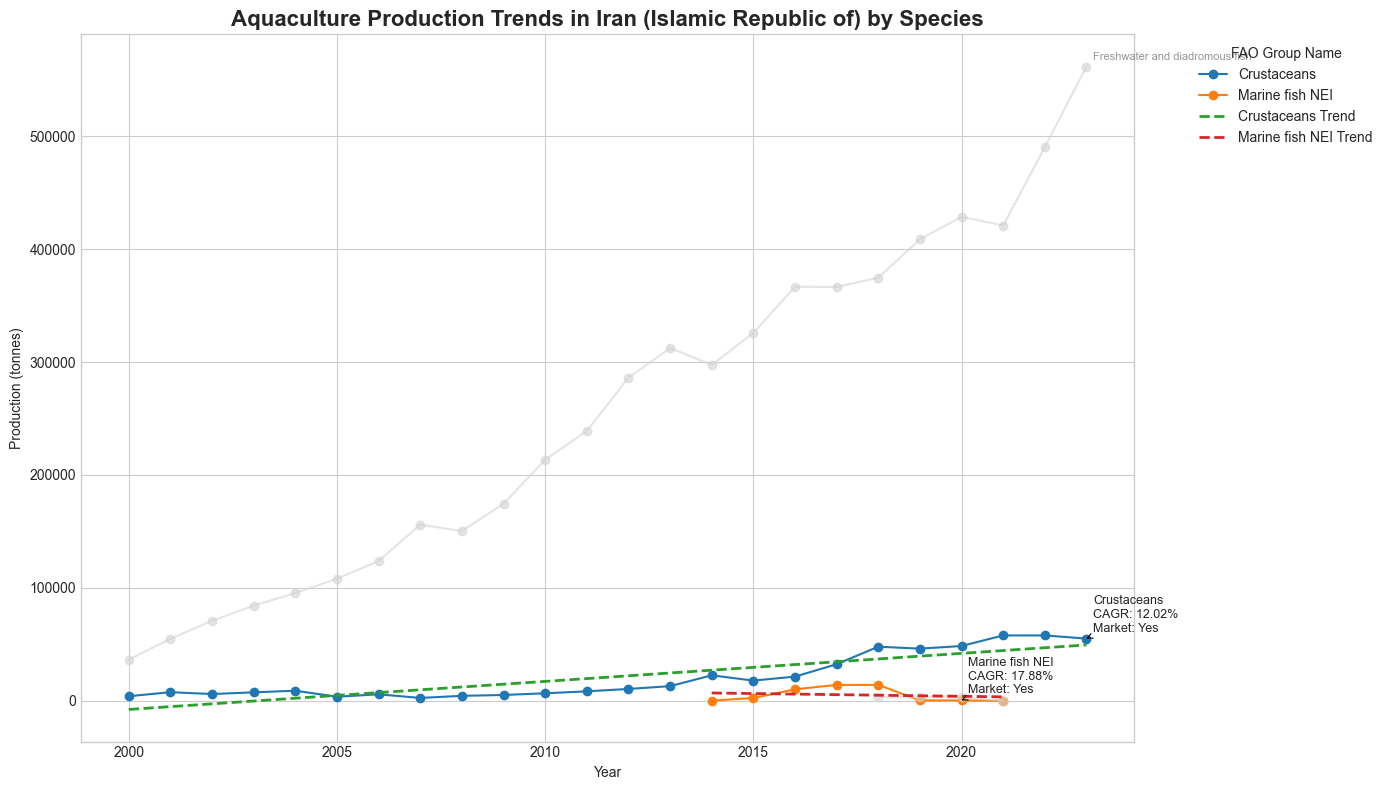

,FAO Group Name,CAGR,Start Year,End Year,Start Prod,End Prod,My Product Market?
0,Crustaceans,0.120171,2000,2023,4050.0,55080.0,Yes
1,Demersal fish,0.008032,2018,2020,3100.0,3150.0,No
2,Freshwater and diadromous fish,0.126195,2000,2023,36500.0,561570.0,No
3,Marine fish NEI,0.178786,2014,2020,123.0,330.0,Yes


In [231]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# List of countries you want to analyze
# Assuming top30_country is defined elsewhere, e.g.:
# top30_country = ['China', 'Indonesia', 'India', ...] 

# Product lines to highlight
high_value = ["Crustaceans", "Marine fish NEI"]

for target_country in list_country_vizing:
    df_country = df_aqua[df_aqua['Country'] == target_country]

    df_species = (
        df_country.groupby(['Year', 'FAO Group Name'])['Production']
        .sum()
        .reset_index()
    )

    # Calculate CAGR
    results = []
    for species, group in df_species.groupby('FAO Group Name'):
        group = group.sort_values('Year')
        group_nonzero = group[(group['Production'] > 0) & (group['Production'].notna())]
        
        if len(group_nonzero) < 2:
            continue
        
        start_year = group_nonzero['Year'].iloc[0]
        end_year = group_nonzero['Year'].iloc[-1]
        start_val = group_nonzero['Production'].iloc[0]
        end_val = group_nonzero['Production'].iloc[-1]
        
        if start_val > 0 and end_year > start_year:
            cagr = (end_val / start_val) ** (1 / (end_year - start_year)) - 1
        else:
            cagr = 0
        
        results.append({
            'FAO Group Name': species,
            'CAGR': cagr,
            'Start Year': start_year,
            'End Year': end_year,
            'Start Prod': start_val,
            'End Prod': end_val
        })

    df_c_species_cagr = pd.DataFrame(results)
    if not df_c_species_cagr.empty: # Avoid error if no species meet criteria
        df_c_species_cagr['My Product Market?'] = df_c_species_cagr['FAO Group Name'].apply(
            lambda x: 'Yes' if x in high_value else 'No'
        )

    # Plot
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(14, 8))
    gray_labels = []

    for species in df_species['FAO Group Name'].unique():
        subset = df_species[df_species['FAO Group Name'] == species]
        
        if species in high_value:
            plt.plot(subset['Year'], subset['Production'], marker='o', label=species)
        else:
            line, = plt.plot(
                subset['Year'], subset['Production'], color='lightgray',
                marker='o', linestyle='-', alpha=0.6
            )
            gray_labels.append((species, subset))

    # Trend + annotations
    for species in high_value:
        # --- Trend Line Plotting ---
        subset = df_species[df_species['FAO Group Name'] == species]
        if len(subset) >= 2:
            X = subset['Year'].values.reshape(-1, 1)
            y = subset['Production'].values
            model = LinearRegression().fit(X, y)
            y_pred = model.predict(X)
            plt.plot(subset['Year'], y_pred, linestyle='--', linewidth=2, label=f"{species} Trend")

        # --- Annotation (THIS IS THE CORRECTED PART) ---
        # First, filter the CAGR dataframe
        cagr_info = df_c_species_cagr[df_c_species_cagr['FAO Group Name'] == species]
        
        # NOW, CHECK if the result is empty before trying to access a row
        if not cagr_info.empty:
            # If it's not empty, we can safely get the first row
            row = cagr_info.iloc[0]
            plt.annotate(
                f"{species}\nCAGR: {row['CAGR']*100:.2f}%\nMarket: Yes",
                xy=(row['End Year'], row['End Prod']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=9,
                arrowprops=dict(arrowstyle='->', lw=0.8)
            )

    # Subtle gray labels
    for species, subset in gray_labels:
        # Added a check to ensure subset is not empty before calling .max()
        if not subset.empty and subset['Production'].max() > df_species['Production'].quantile(0.75):
            end_row = subset[subset['Year'] == subset['Year'].max()]
            if not end_row.empty: # Also check if end_row is not empty
                plt.annotate(
                    species,
                    xy=(end_row['Year'].values[0], end_row['Production'].values[0]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8,
                    color='dimgray',
                    alpha=0.7
                )

    # Finalize plot
    plt.title(f"Aquaculture Production Trends in {target_country} by Species", fontsize=16, fontweight='bold')
    plt.xlabel("Year")
    plt.ylabel("Production (tonnes)")
    plt.legend(title="FAO Group Name", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Save figure
    filename = f"Visuals/final/Aquaculture_Production_Trends_{target_country.replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300)
    plt.show()

    # Optional: Display table for review
    if not df_c_species_cagr.empty:
        display(df_c_species_cagr)

It look like that there are 4 countries that can be our market besides china which is equador, indonesia, viet nam, and india if we based our calculations on position on the quadrant, its compatibility with our line of product and also its CAGR and volitality in our spesific group species product market

## 🌊 Phase 5: The Synthesis – The Final Recommendation

### 🏁 Ultimate Business Question

> *"Considering market size, growth rate, stability, and species composition, which one or two countries present the most attractive and strategically aligned opportunity for my aquaculture tools and kit company to expand into?"*

---

### 📌 Summary of Key Findings

1️⃣ **Market Size**

* Countries like **China** and **Indonesia** dominate production volumes. However, China's market may be harder to penetrate due to maturity, regulatory complexity, and fierce domestic competition.

2️⃣ **Growth Rate (CAGR)**

* High CAGR observed in countries like **Angola**, **Afghanistan**, and **Albania**, but these often represent small, volatile, or emerging sectors.

3️⃣ **Stability (Volatility)**

* Countries such as **Indonesia** and **Vietnam** demonstrate steady year-over-year production growth with relatively low volatility, making them more predictable for business planning.

4️⃣ **Species Composition**

* We focused on *Crustaceans* and *Marine fish NEI*, aligning with our product portfolio. Both **Indonesia** and **Vietnam** showed strong presence in these categories.

5️⃣ **Score (Combined Metric)**

* Our scoring combined growth, production volume, and volatility. **Indonesia** and **Vietnam** consistently ranked near the top.

---

### ⭐ Final Recommendation

✅ **Primary Target: Indonesia**

* Large and growing production in target species.
* Strong CAGR with relatively low volatility.
* A well-established aquaculture sector aligned with our strategic focus.

✅ **Secondary Target: Vietnam**

* High production and growth in *Crustaceans* and *Marine fish NEI*.
* Good stability and export competitiveness.

---

### 📈 Rationale

| Factor                 | Indonesia | Vietnam       |
| ---------------------- | --------- | ------------- |
| Market Size (volume)   | Very High | High          |
| CAGR                   | Moderate  | Moderate-High |
| Stability (Volatility) | Good      | Good          |
| Target Species Fit     | Excellent | Excellent     |
| Strategic Fit          | High      | High          |

---

### 🚀 Next Steps

* Conduct market-level due diligence (regulations, logistics, partners).
* Consider pilot projects or partnerships to validate market entry.
* Develop tailored go-to-market plans for both countries.

---

> **Conclusion:** Indonesia represents the most attractive and strategically aligned opportunity for initial expansion. Vietnam is a strong secondary target and potential next-phase market.
